In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis

In [ ]:
game_logs_df = pd.read_csv('/content/gameLogs.csv')
nba_wl_df = pd.read_csv('/content/nbaHomeWinLossModelDataset.csv')

First 5 rows of the dataset:
   Unnamed: 0       CITY  NICKNAME     TEAM_ID  W  L  W_HOME  L_HOME  W_ROAD  \
0           0    Atlanta     Hawks  1610612737  1  0       1       0       0   
1           1  OPPONENTS   Rockets  1610612745  0  1       0       0       0   
2           2    Atlanta     Hawks  1610612737  1  0       1       0       0   
3           3  OPPONENTS     Magic  1610612753  0  1       0       0       0   
4           4    Atlanta     Hawks  1610612737  1  0       1       0       0   

   L_ROAD  ...   GAME_DATE   GAME_ID  HOME_FLAG  AWAY_FLAG  HOME_WIN_PCTG  \
0       0  ...  2021-05-16  22001066          1          0       0.694444   
1       1  ...  2021-05-16  22001066          0          1       0.250000   
2       0  ...  2021-05-13  22001049          1          0       0.685714   
3       1  ...  2021-05-13  22001049          0          1       0.305556   
4       0  ...  2021-05-12  22001042          1          0       0.676471   

   AWAY_WIN_PCTG  TOTAL_WIN

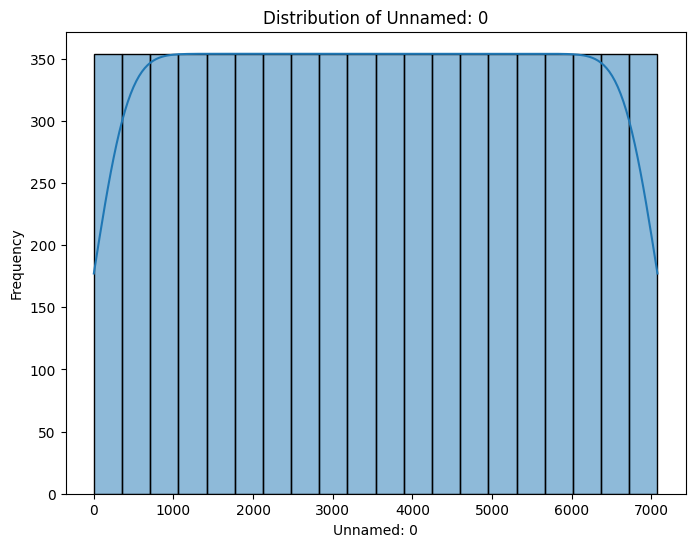

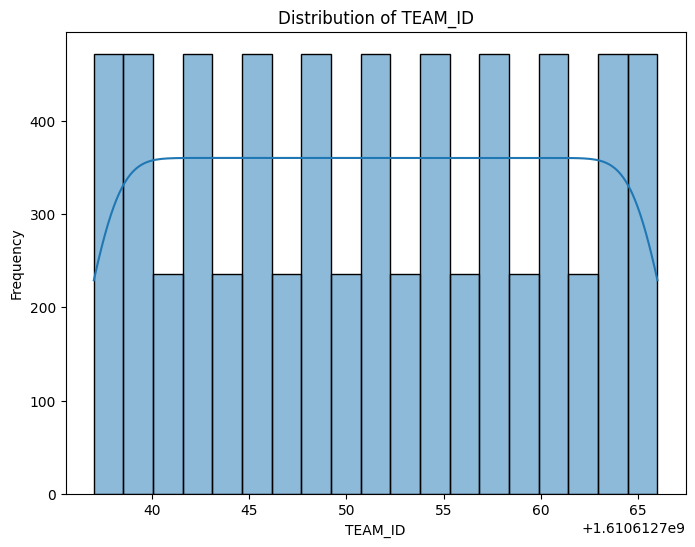

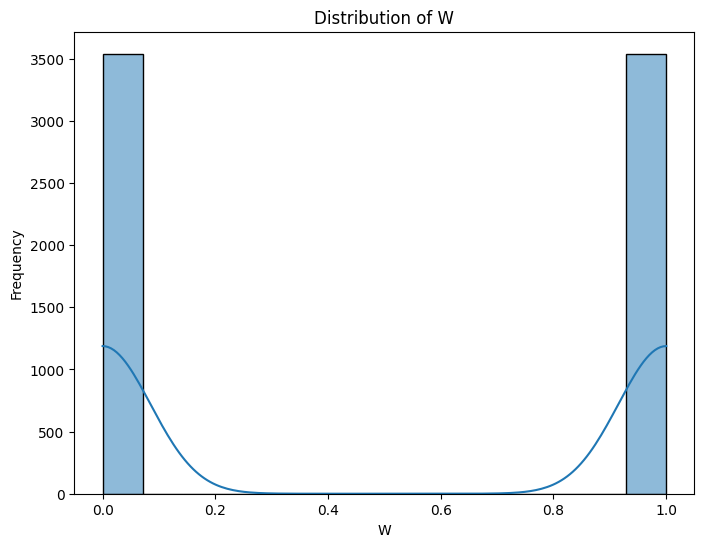

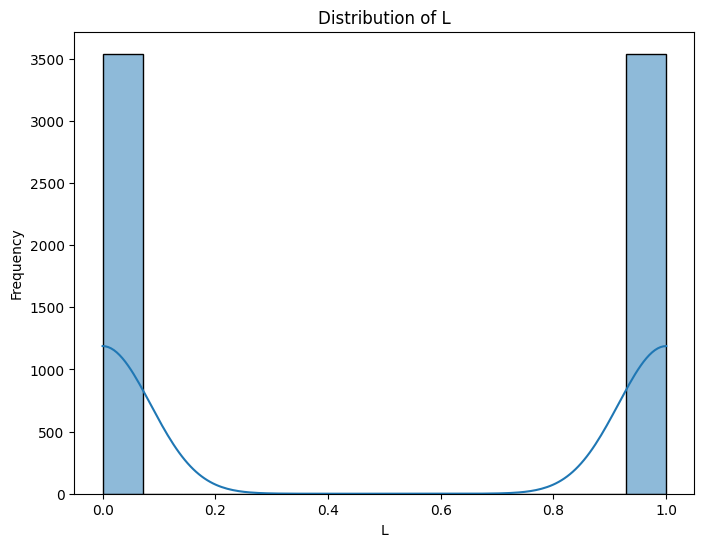

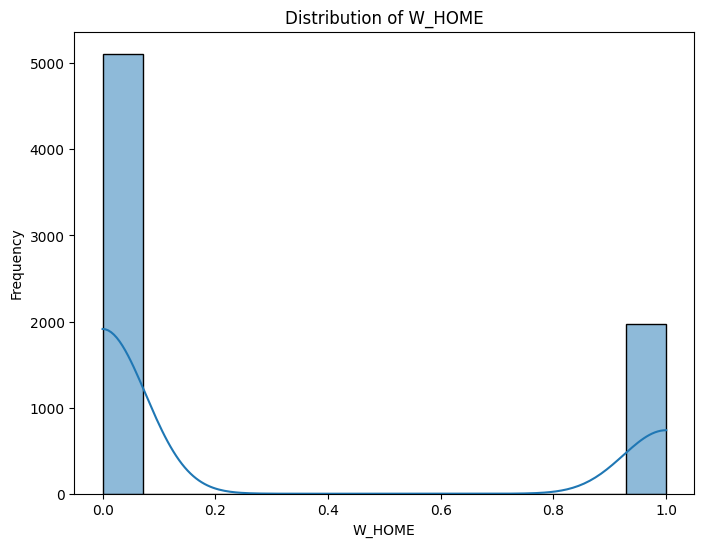

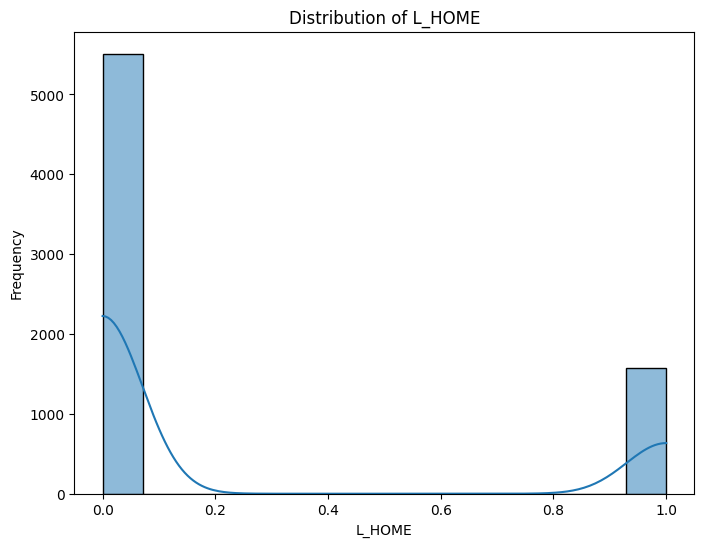

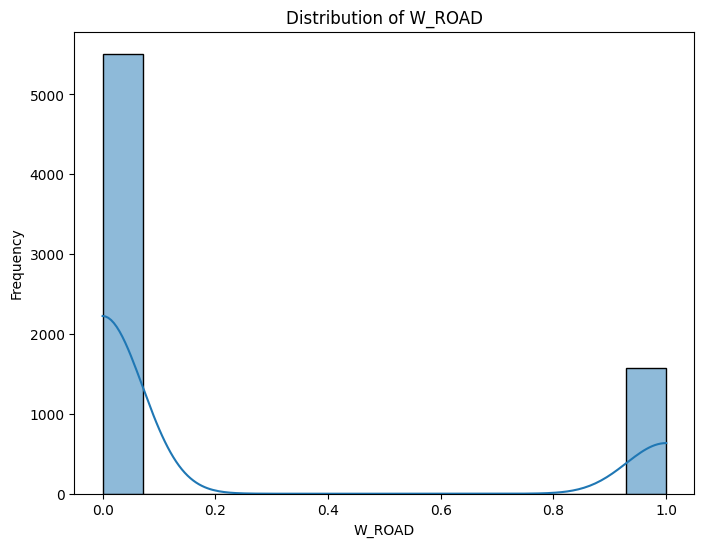

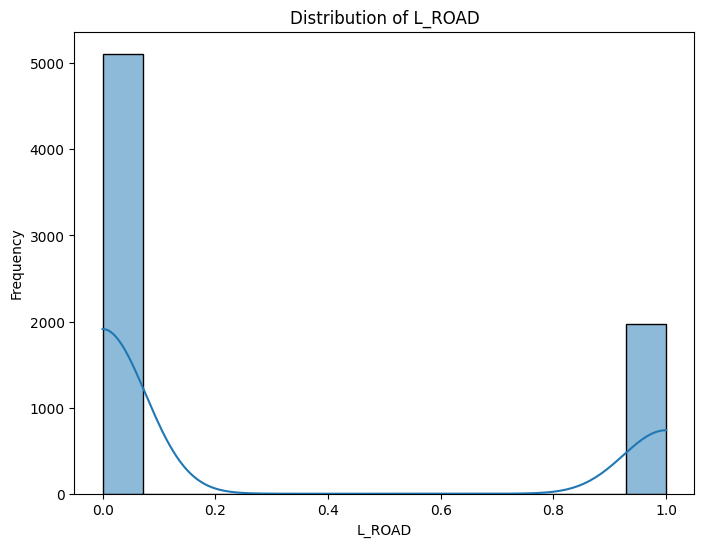

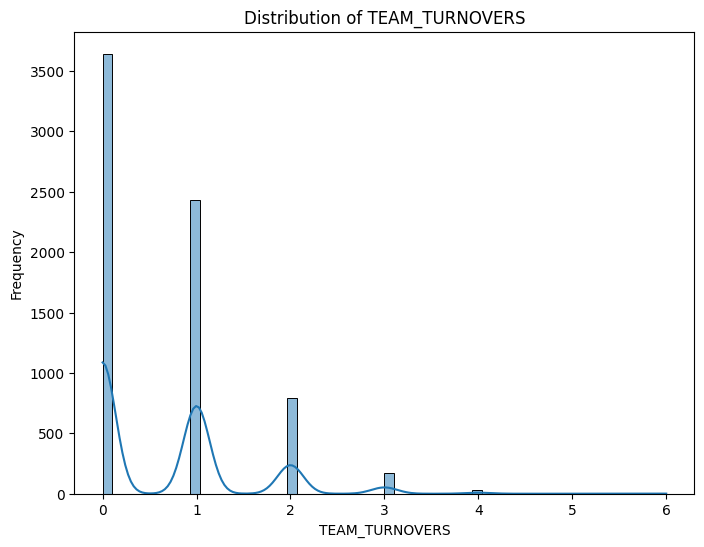

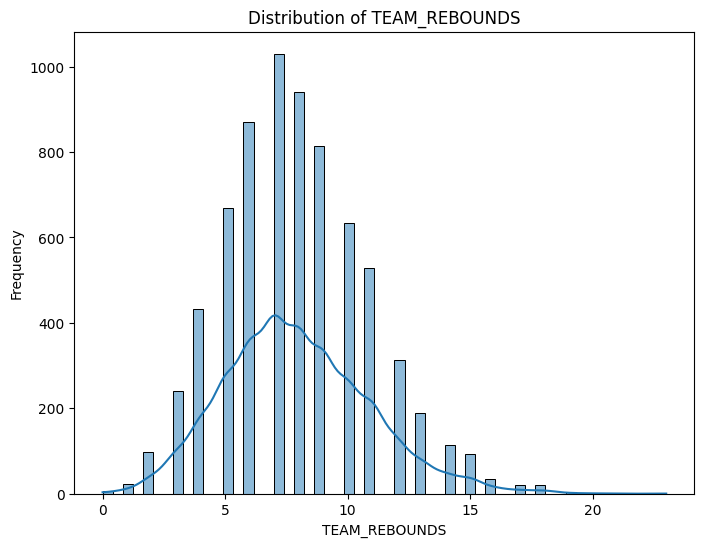

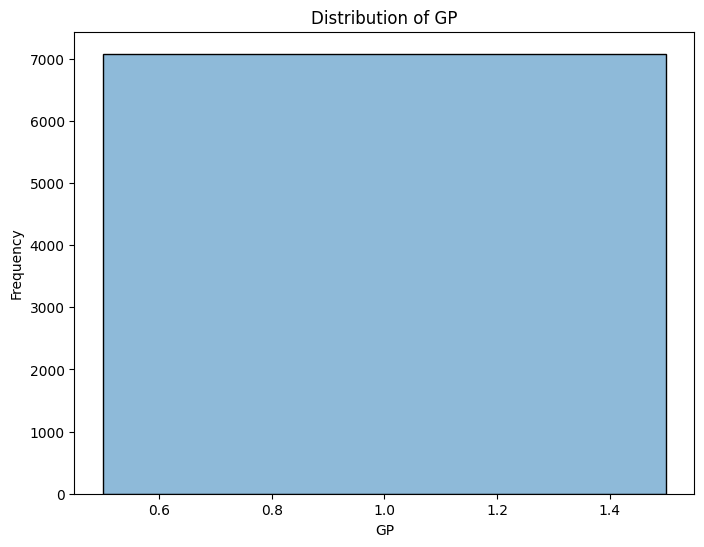

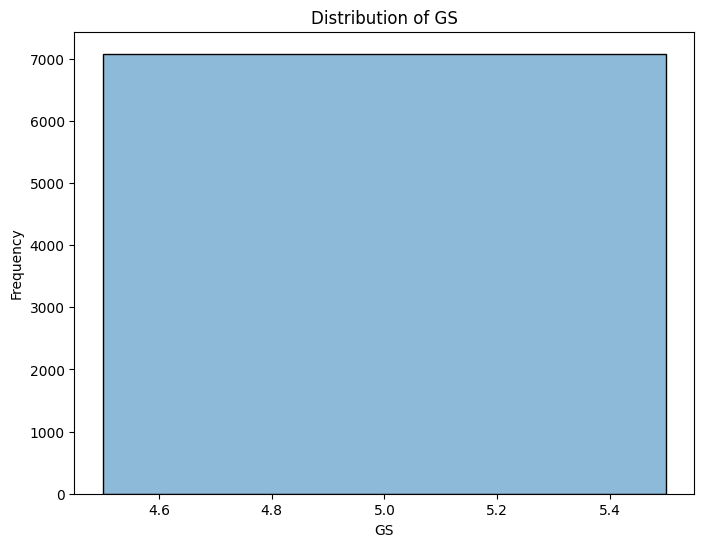

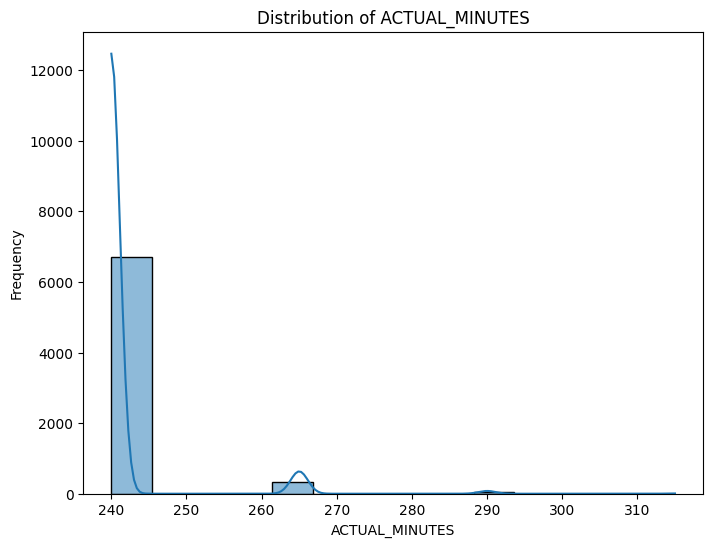

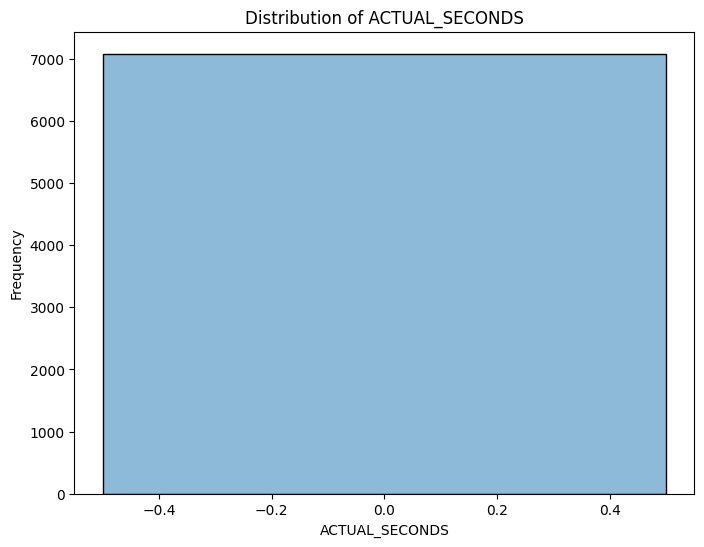

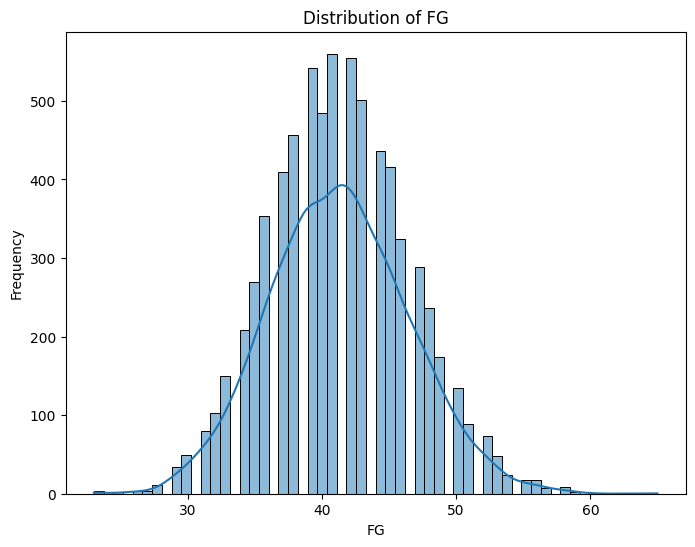

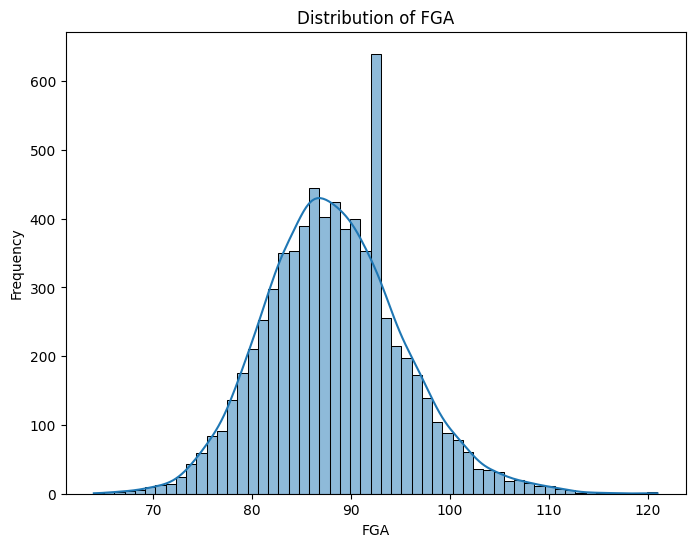

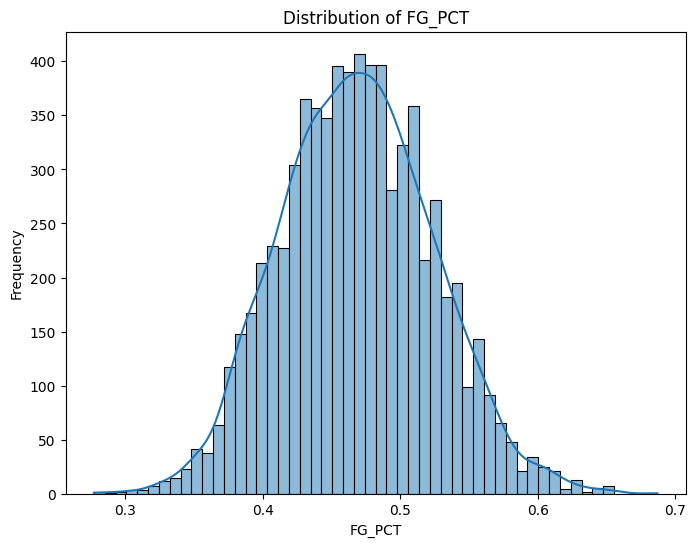

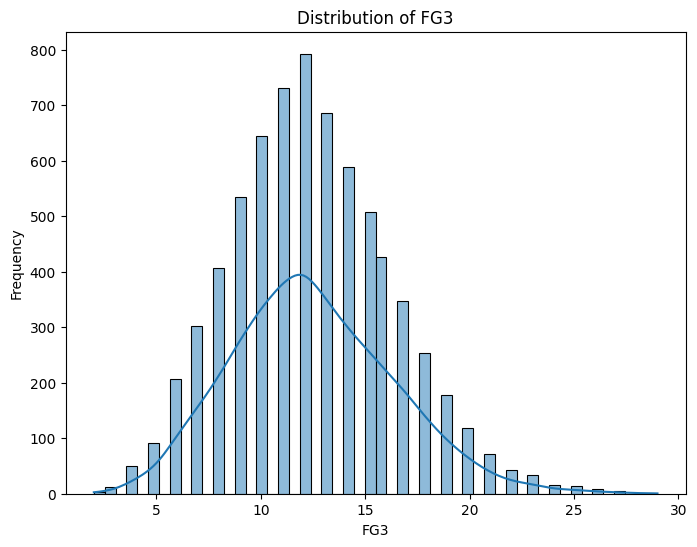

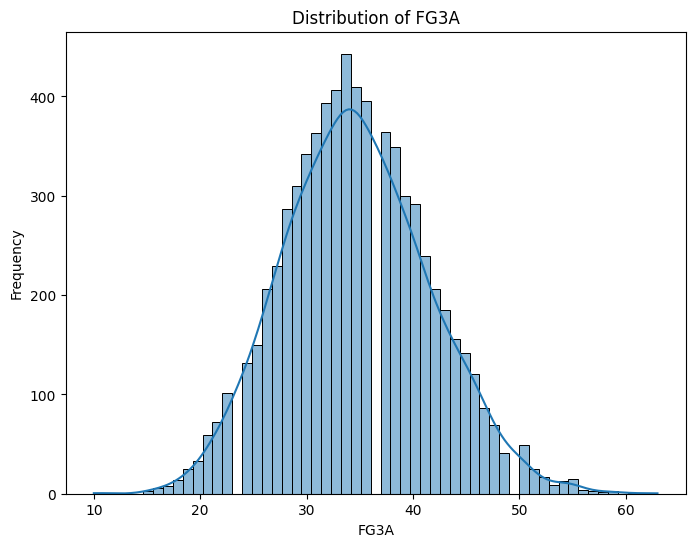

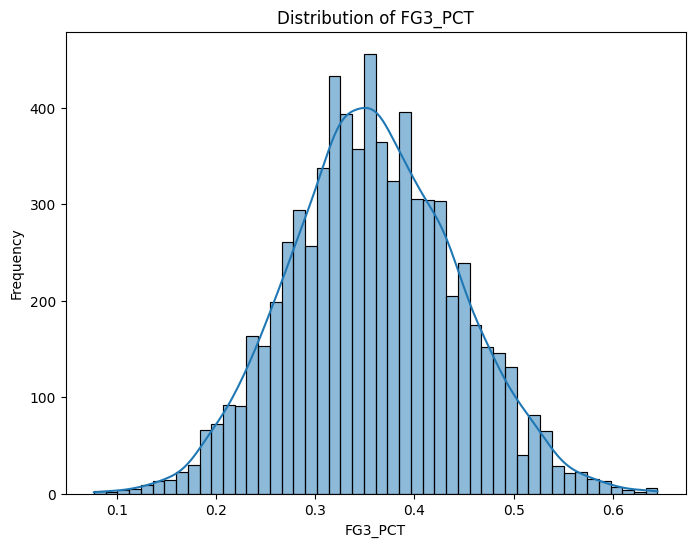

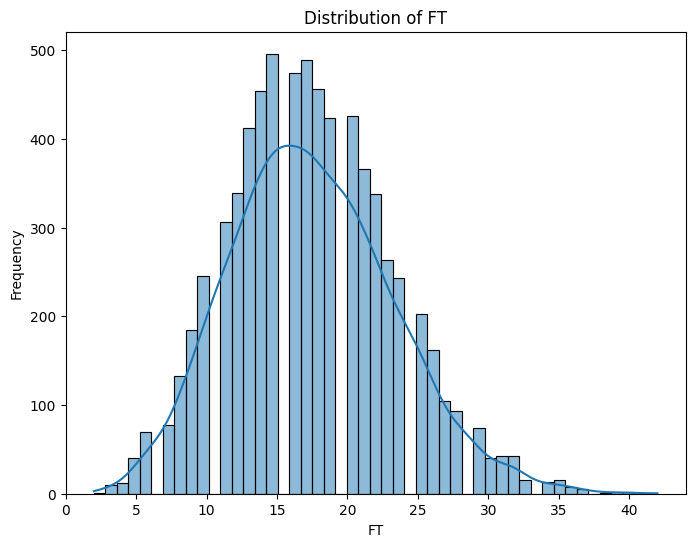

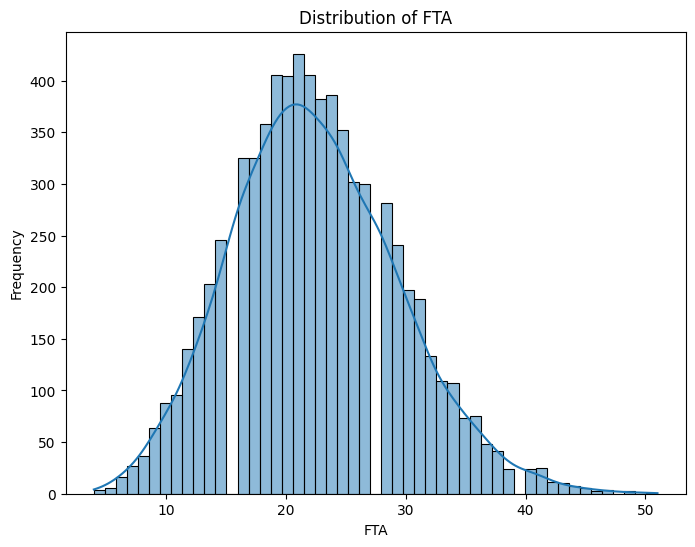

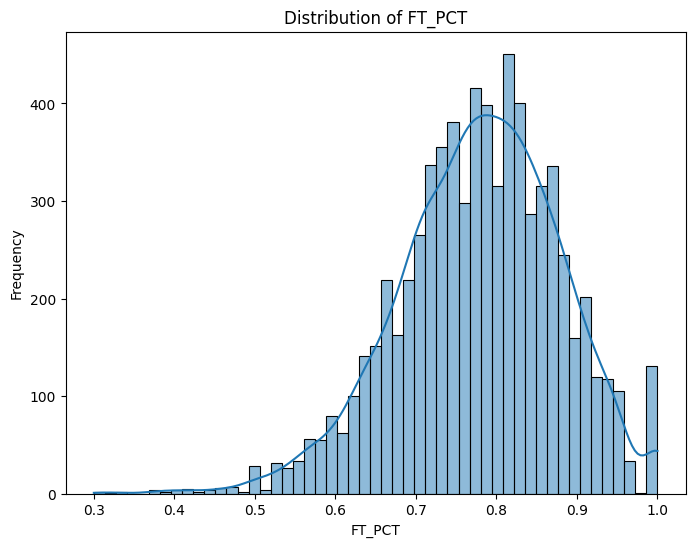

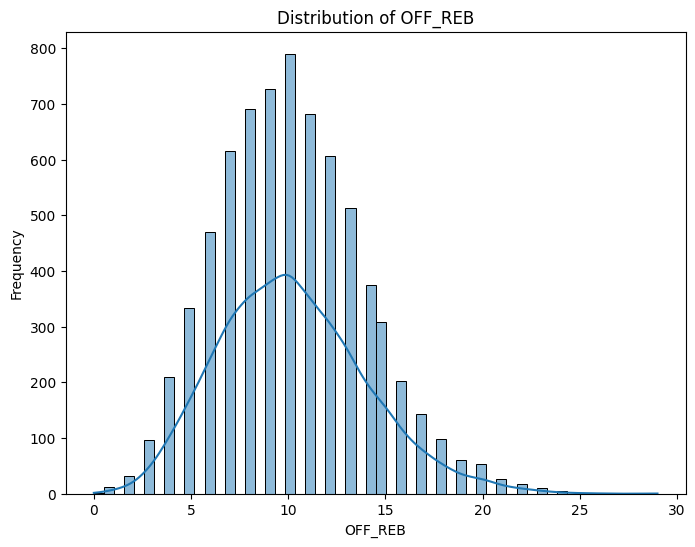

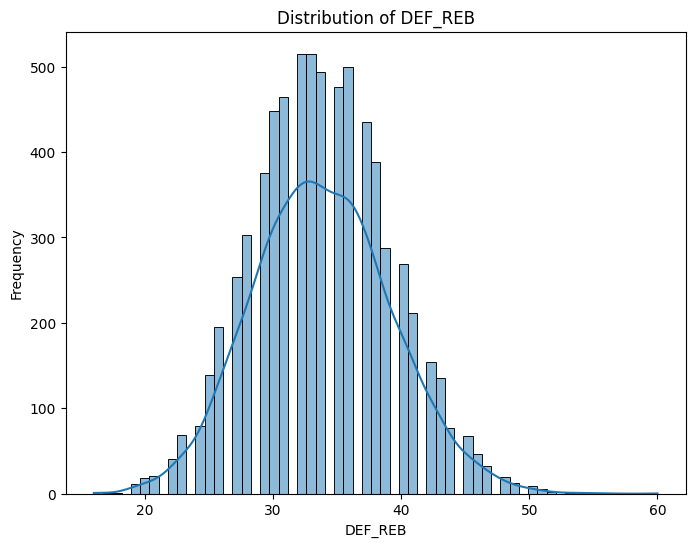

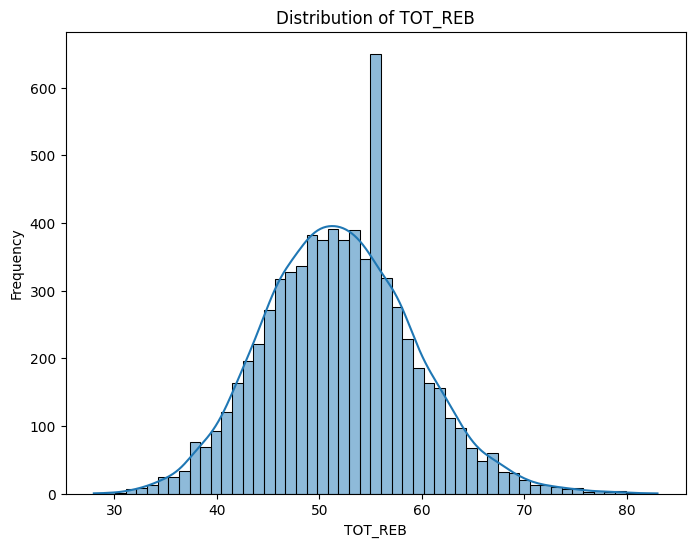

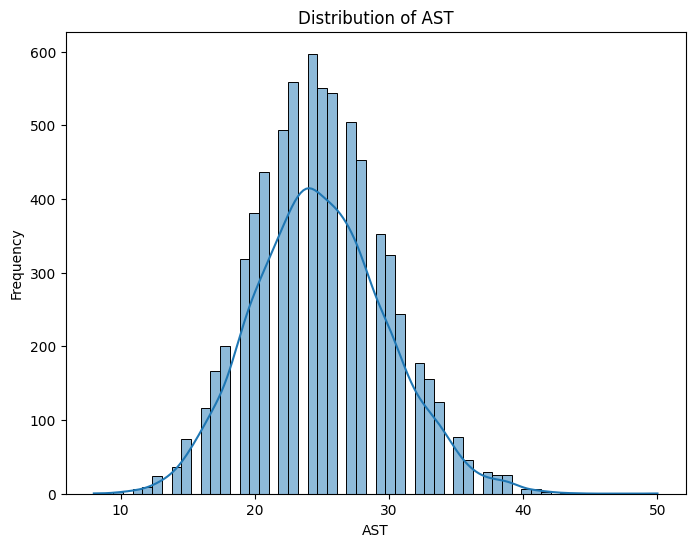

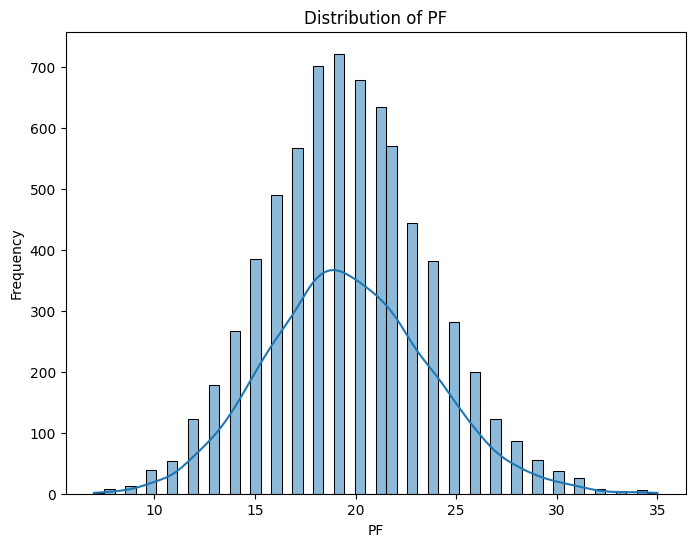

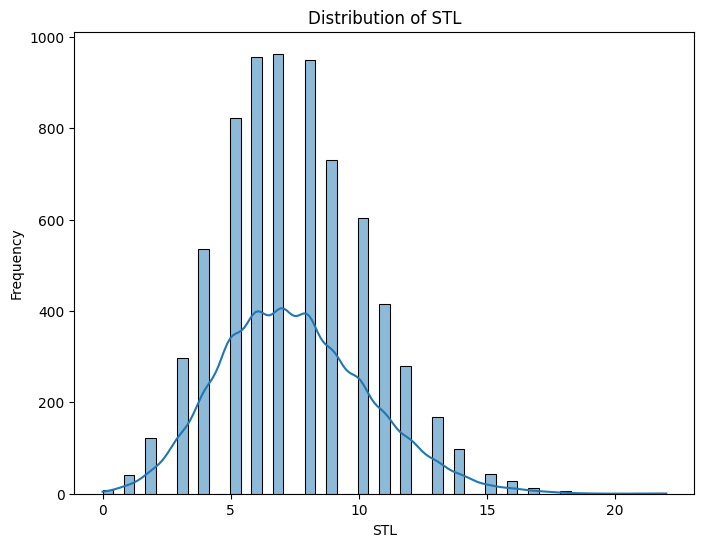

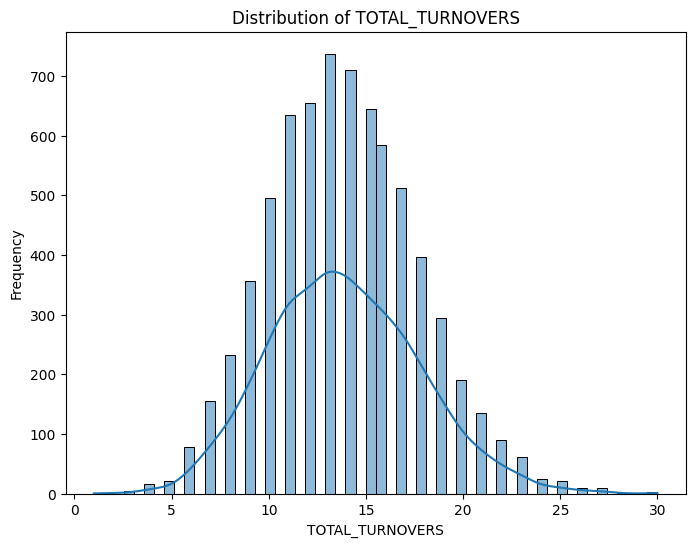

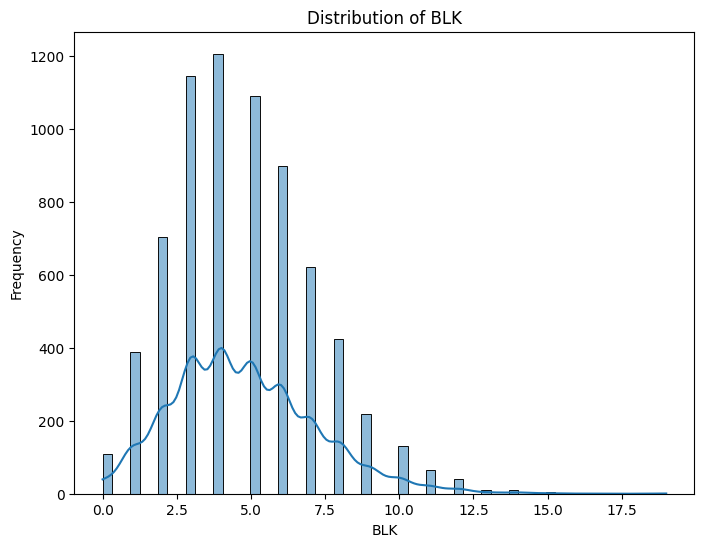

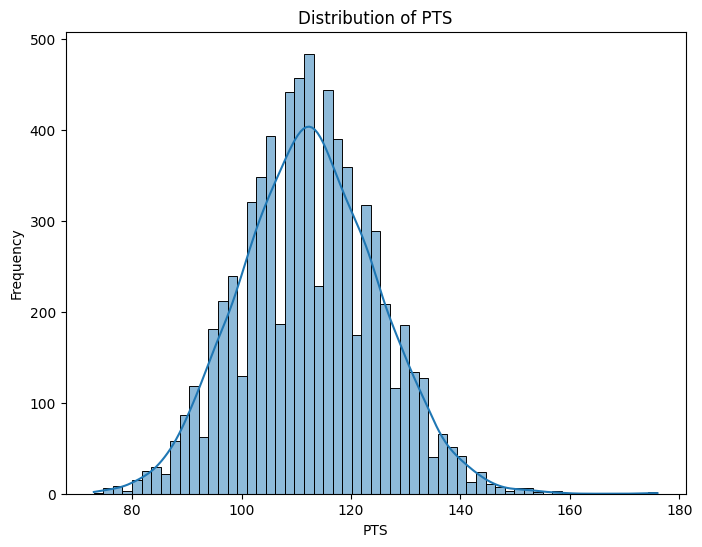

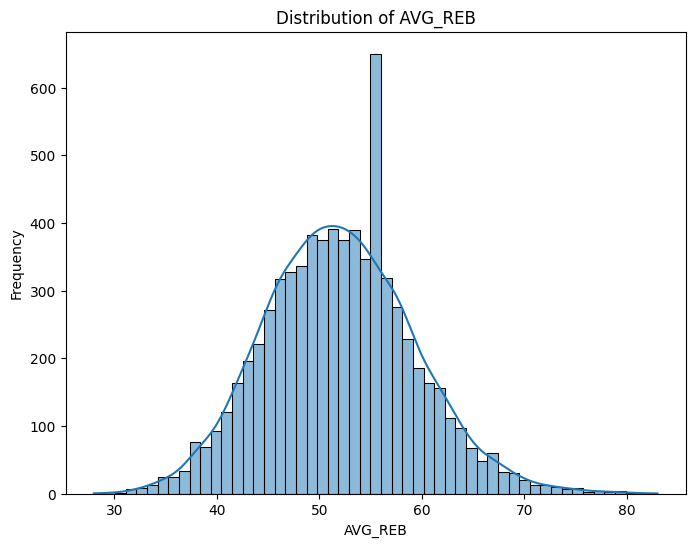

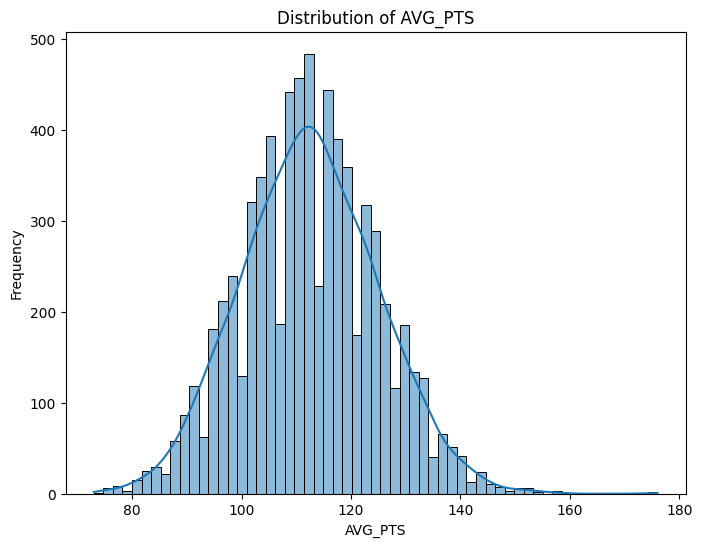

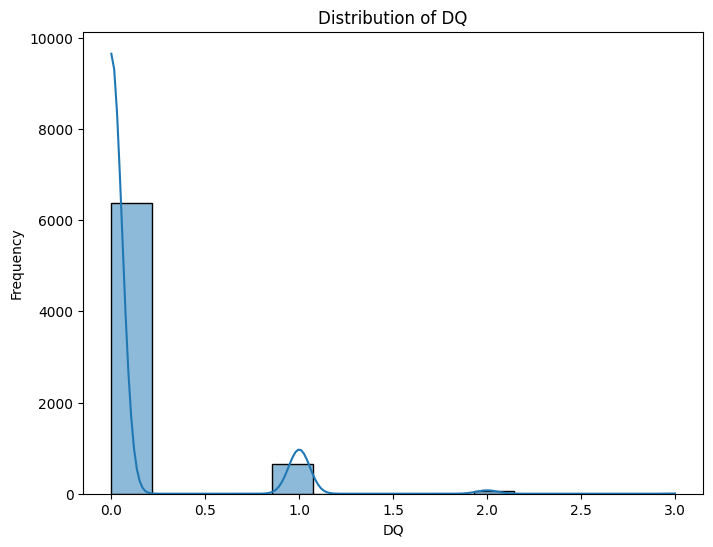

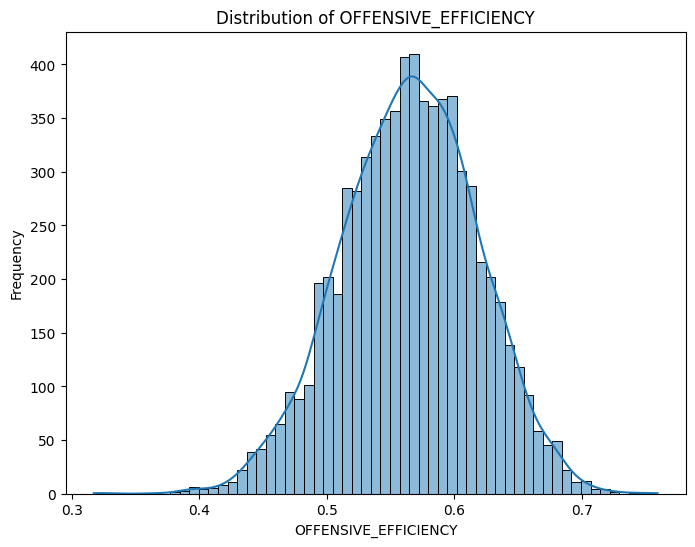

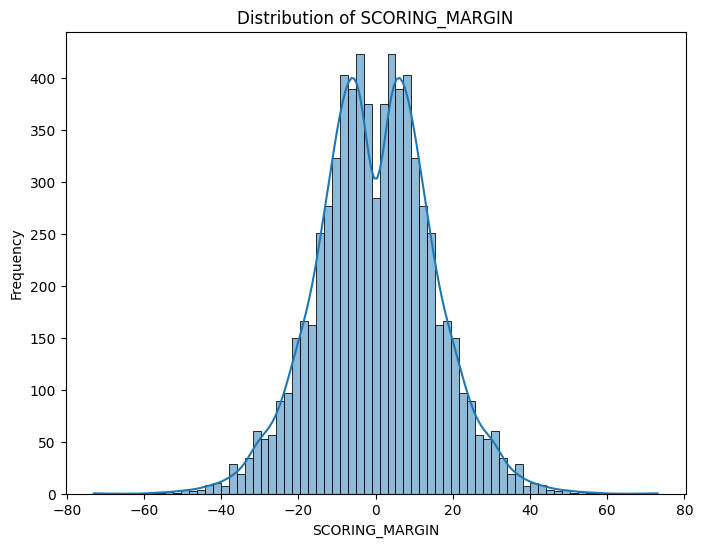

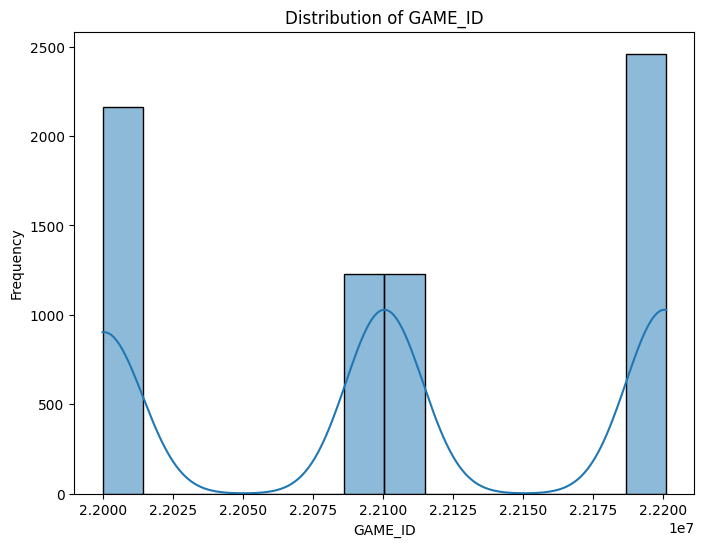

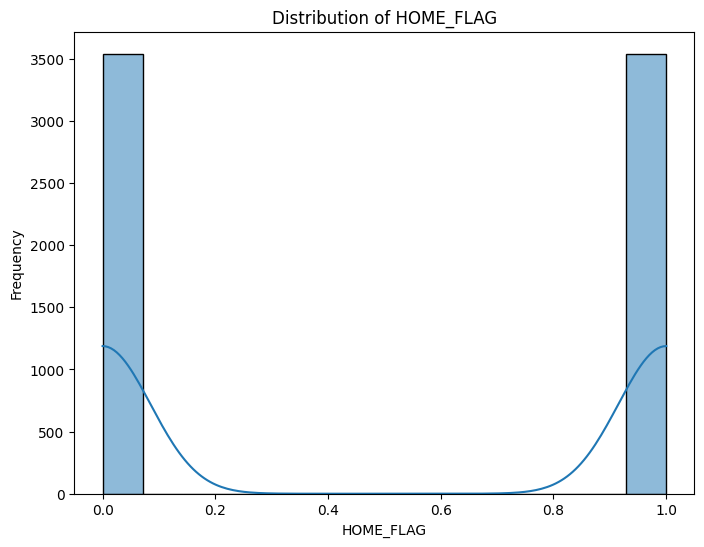

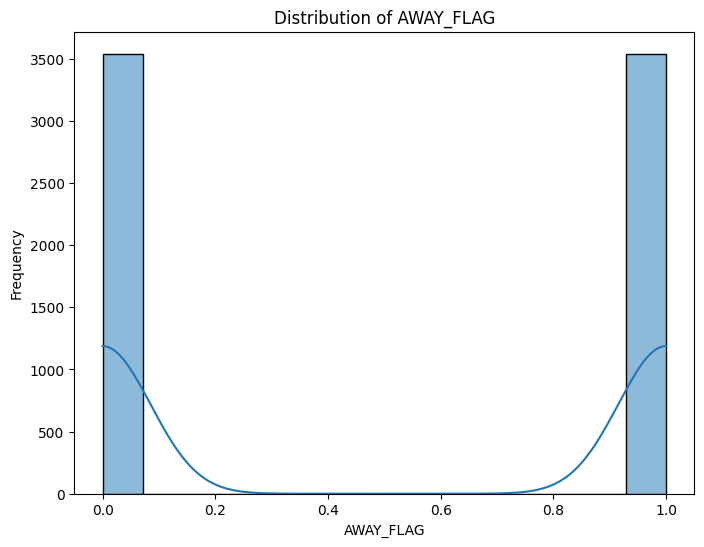

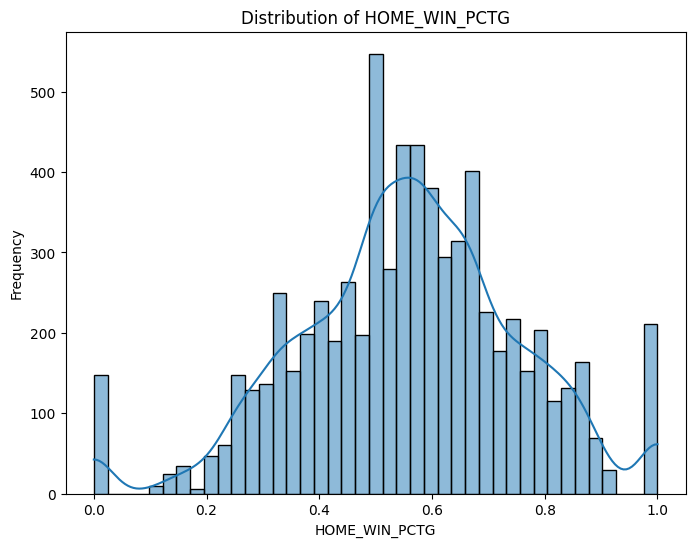

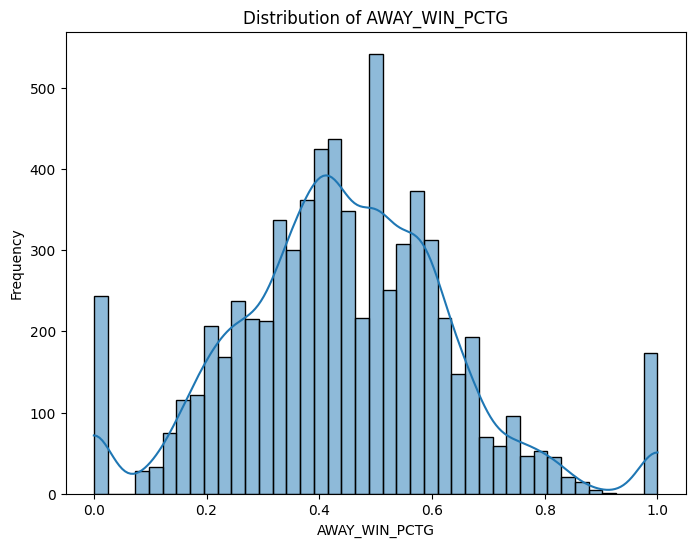

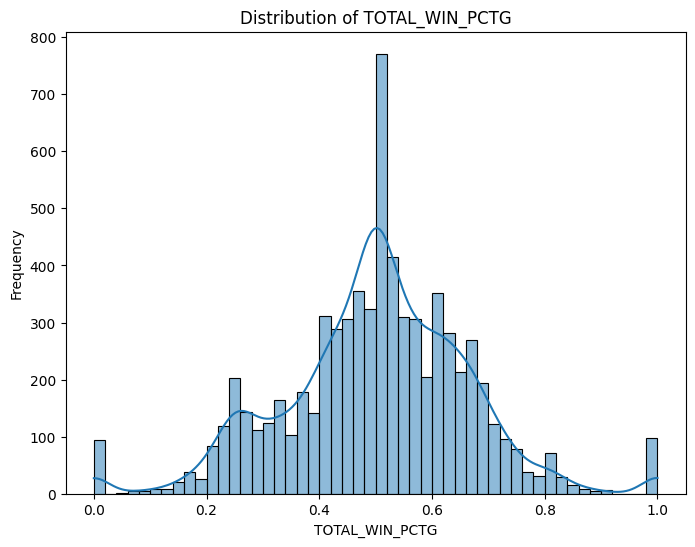

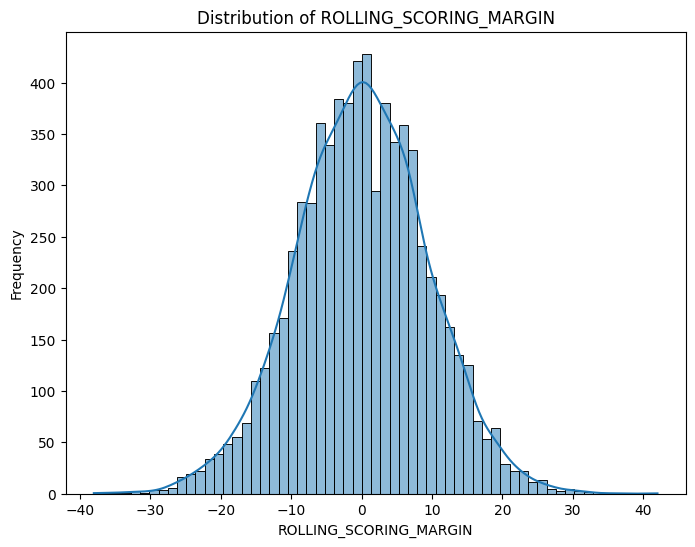

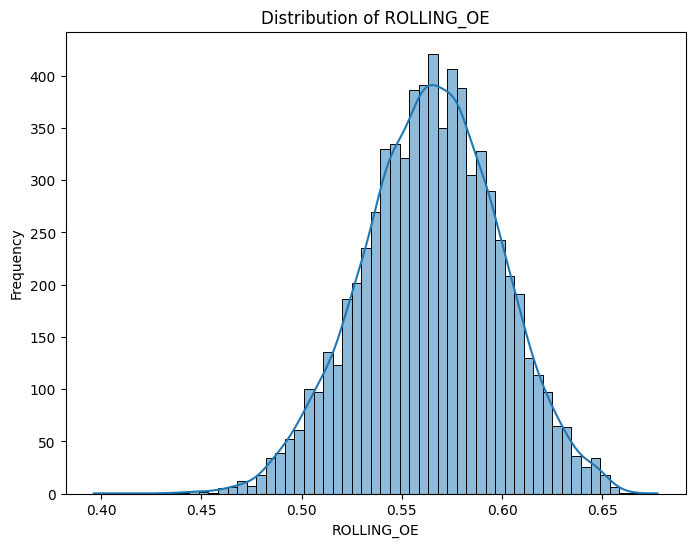

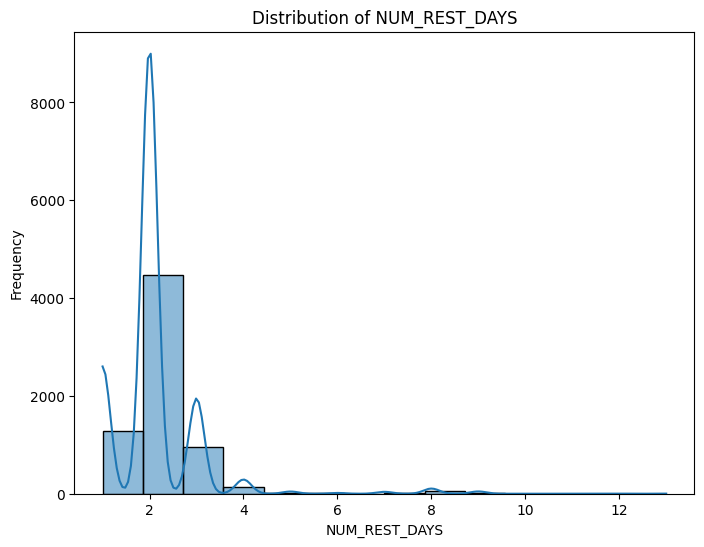

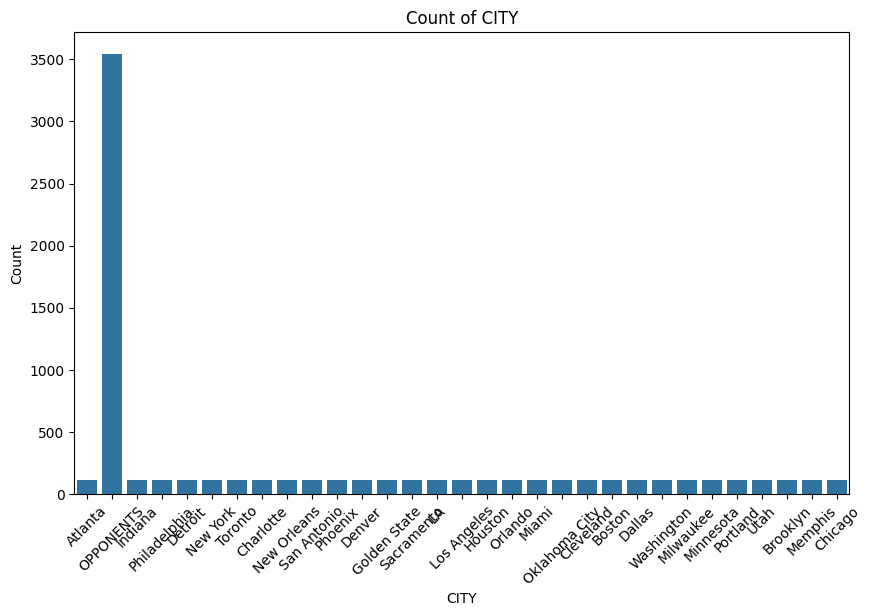

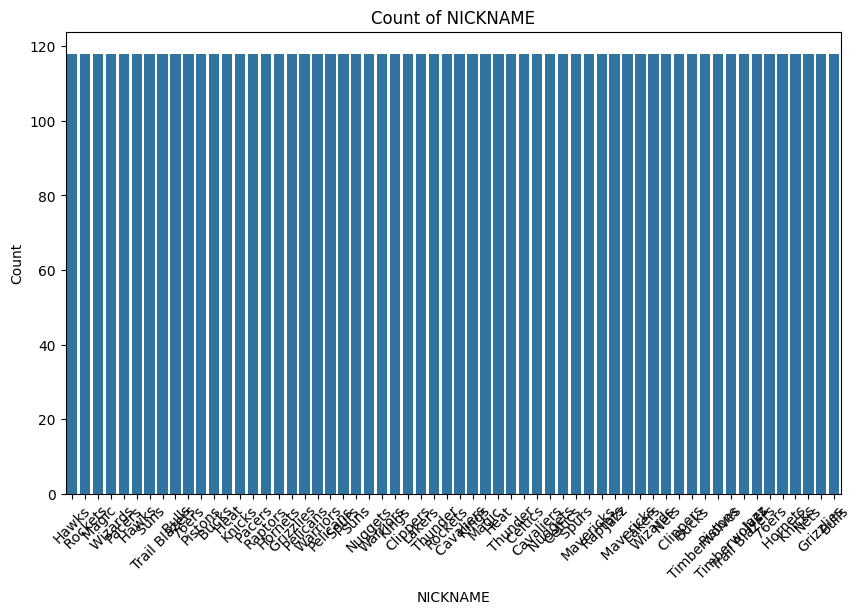

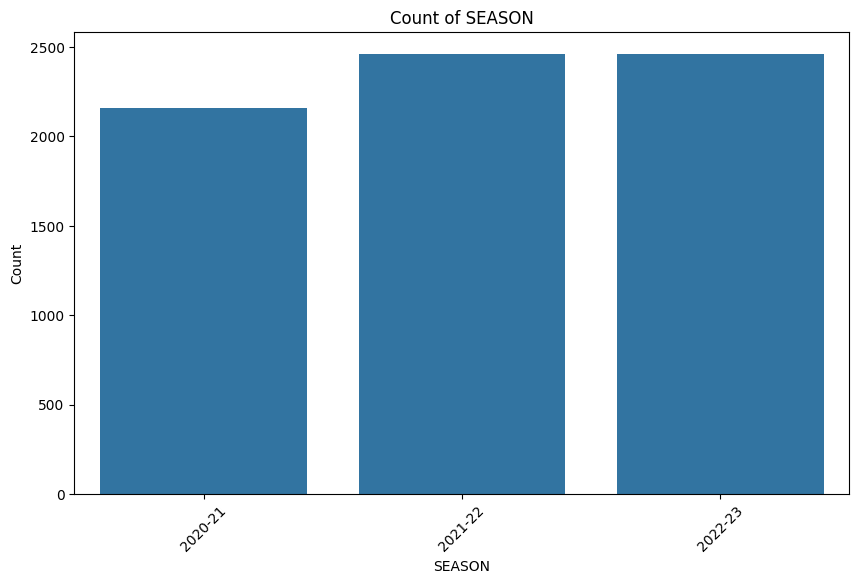

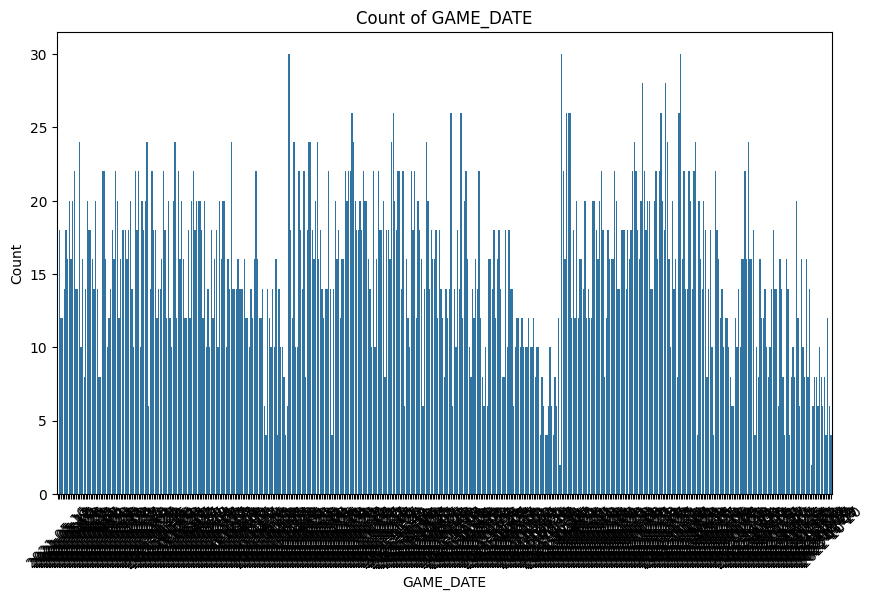

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of your dataset
print("First 5 rows of the dataset:")
print(game_logs_df.head())

# Basic information about the dataset
print("\nBasic information about the dataset:")
print(game_logs_df.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(game_logs_df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(game_logs_df.isnull().sum())

# Visualize distribution of numerical columns
numerical_columns = game_logs_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(game_logs_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# # Visualize relationships between numerical variables
# plt.figure(figsize=(10, 8))
# numerical_corr = game_logs_df[numerical_columns].corr()
# sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

# Visualize relationships between categorical variables
categorical_columns = game_logs_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=game_logs_df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


First 5 rows of the dataset:
   Unnamed: 0  HOME_LAST_GAME_OE  HOME_LAST_GAME_HOME_WIN_PCTG  \
0           0           0.555556                      0.685714   
1           1           0.573913                      0.676471   
2           2           0.584746                      0.666667   
3           3           0.609756                      0.656250   
4           4           0.512397                      0.354839   

   HOME_NUM_REST_DAYS  HOME_LAST_GAME_AWAY_WIN_PCTG  \
0                 3.0                      0.444444   
1                 1.0                      0.444444   
2                 2.0                      0.444444   
3                 4.0                      0.444444   
4                 1.0                      0.558824   

   HOME_LAST_GAME_TOTAL_WIN_PCTG  HOME_LAST_GAME_ROLLING_SCORING_MARGIN  \
0                       0.563380                               9.333333   
1                       0.557143                              -0.666667   
2                 

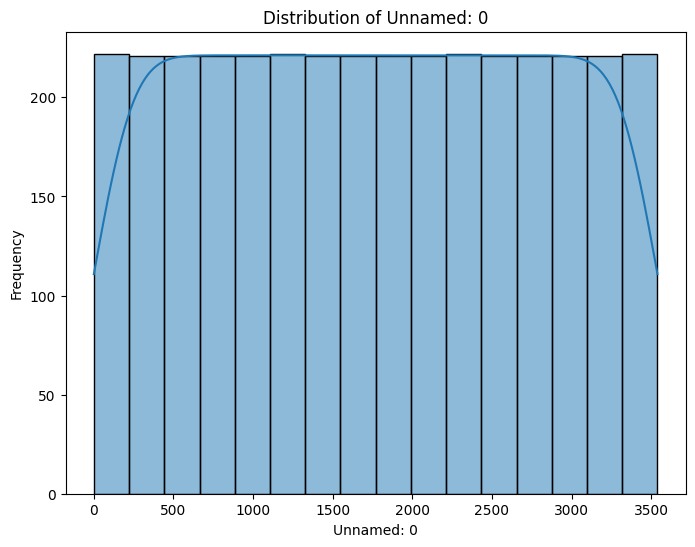

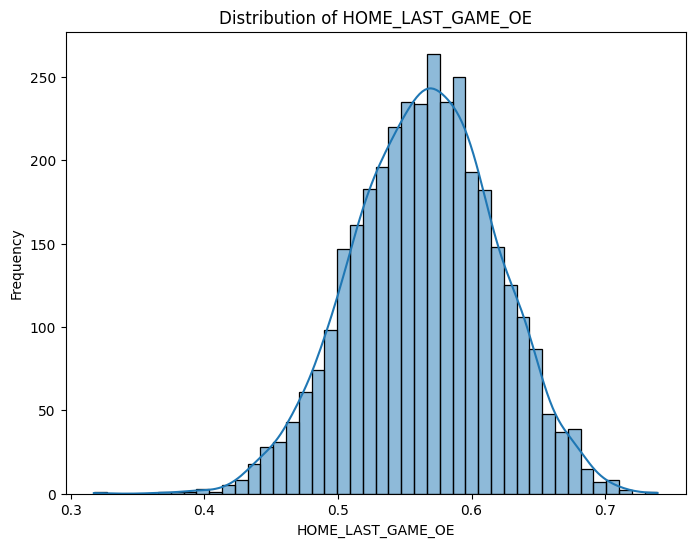

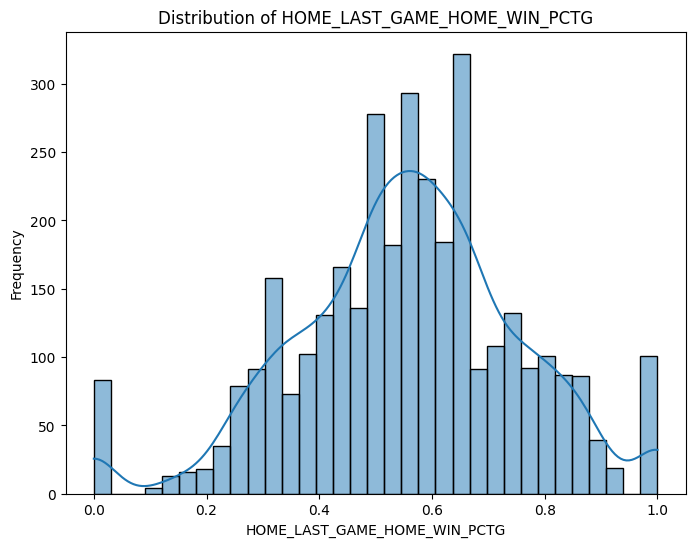

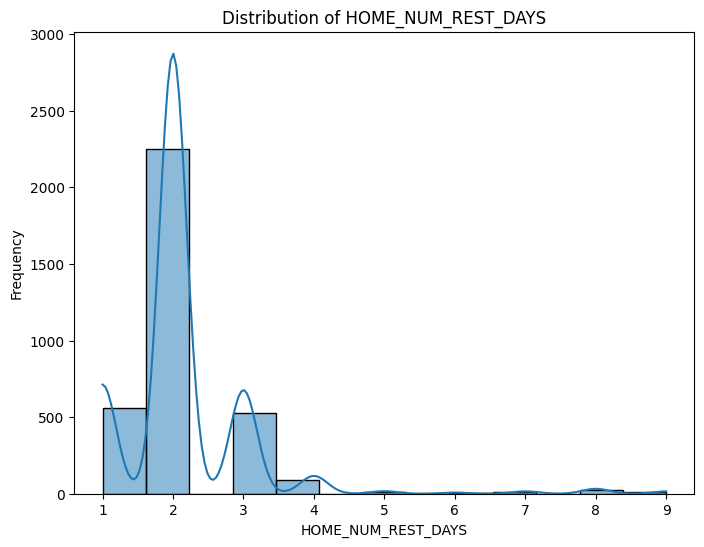

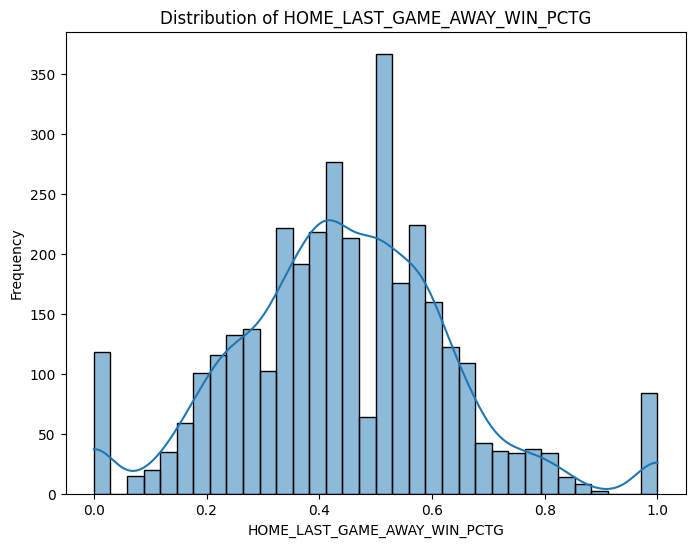

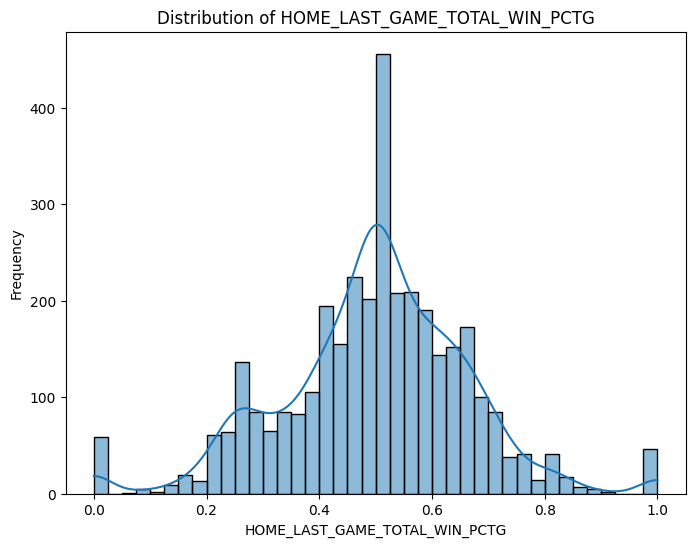

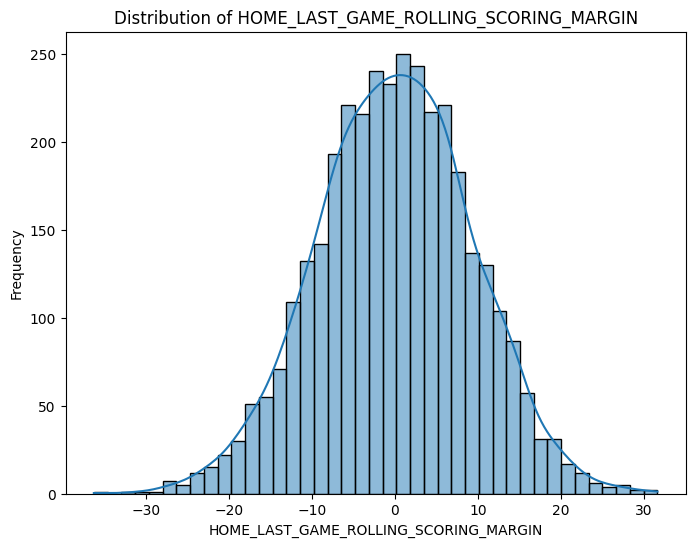

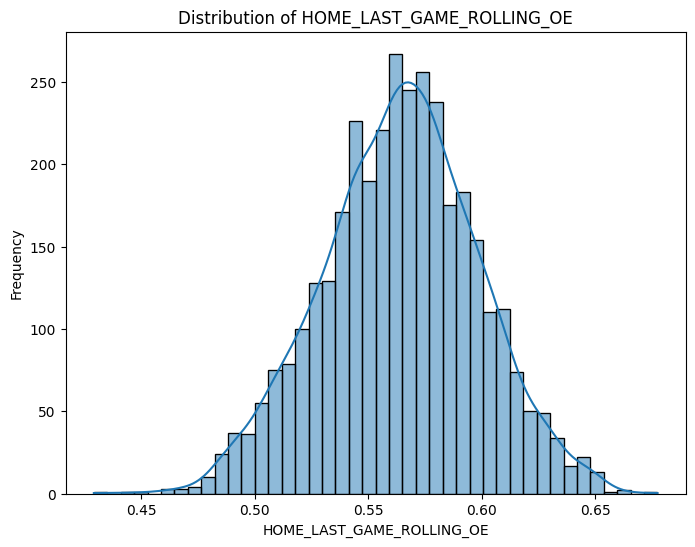

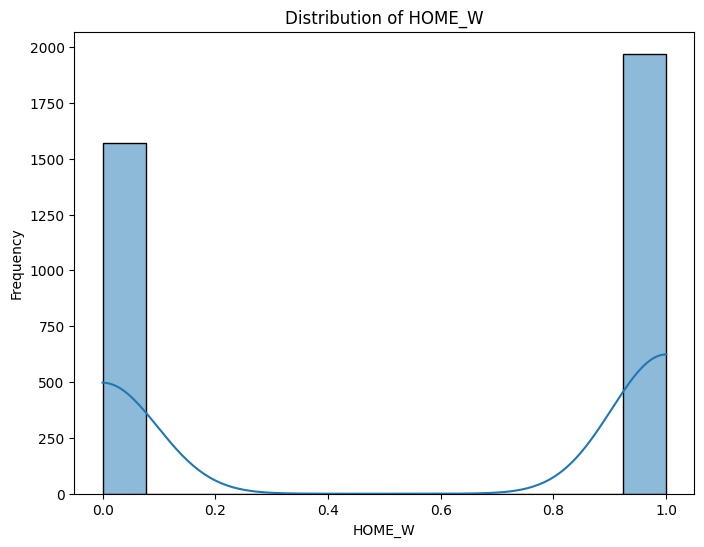

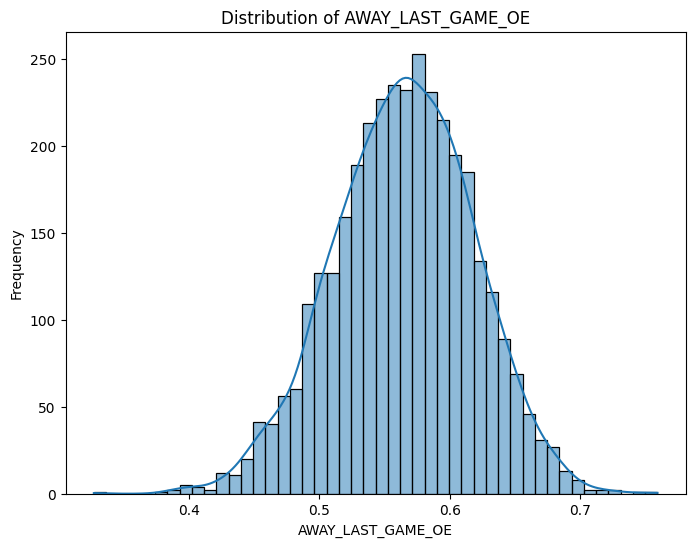

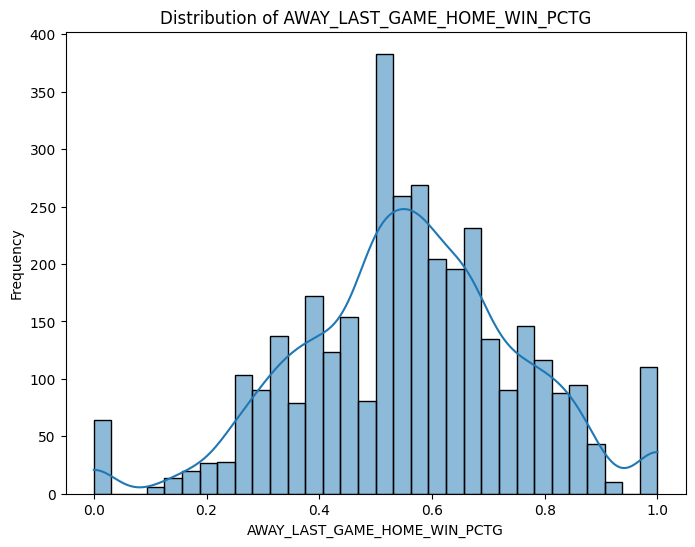

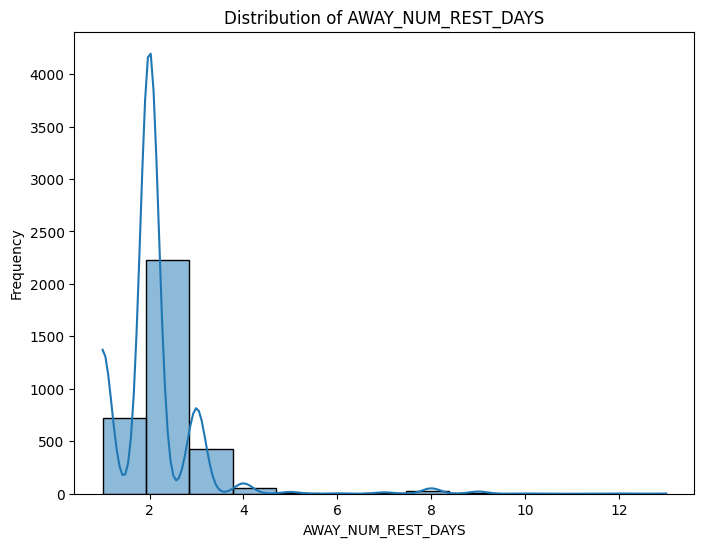

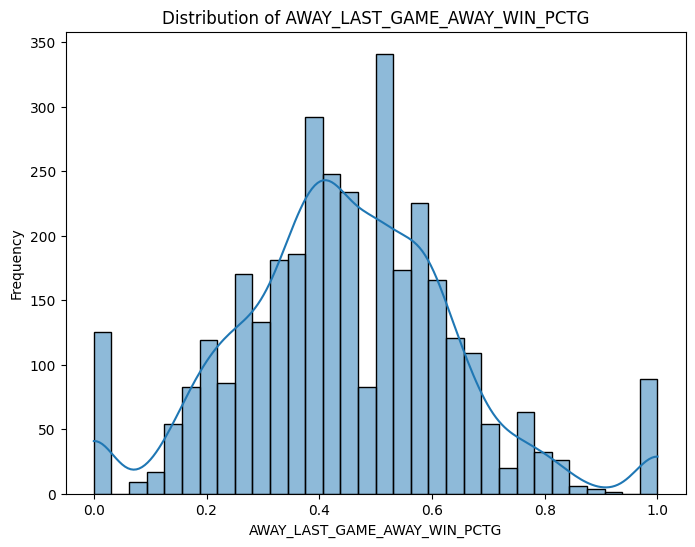

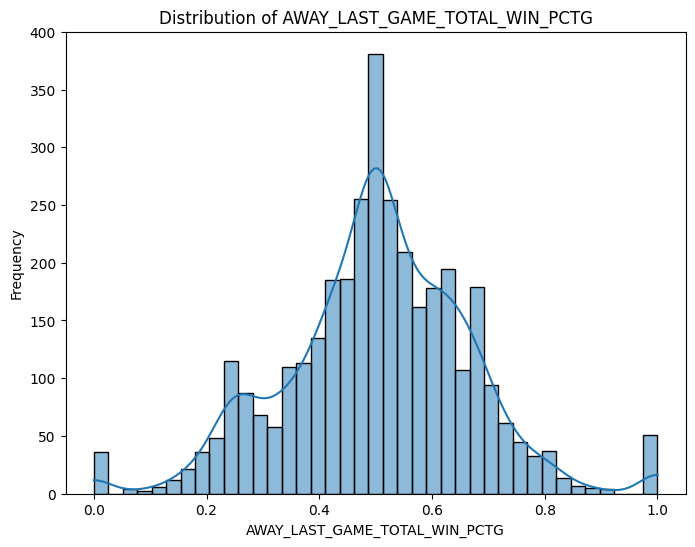

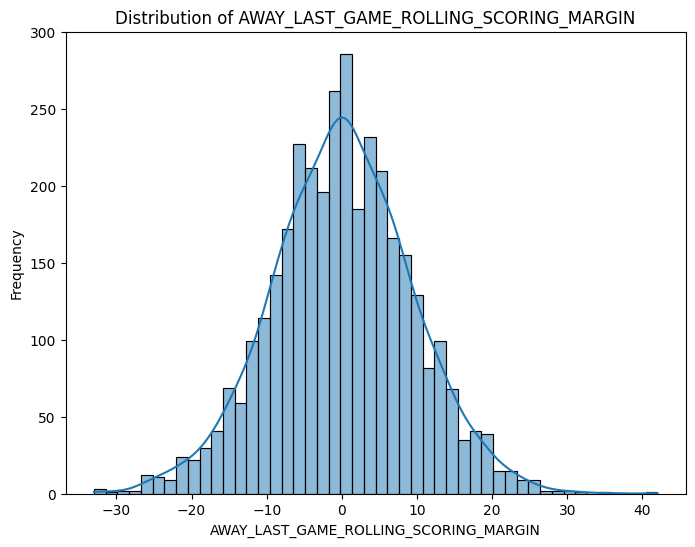

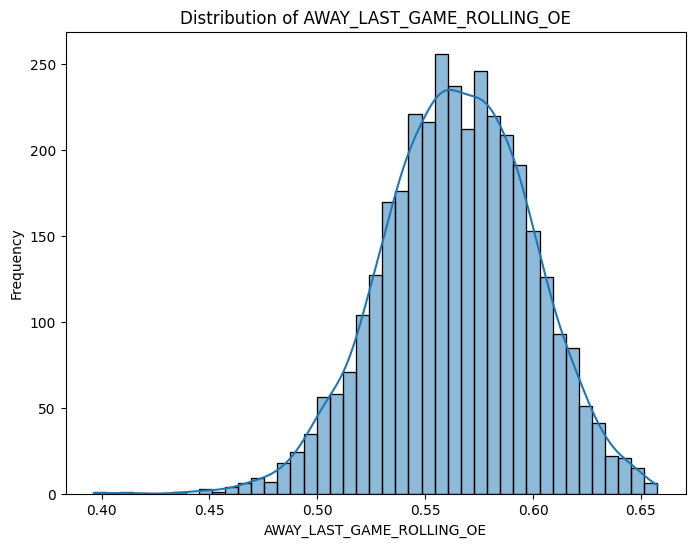

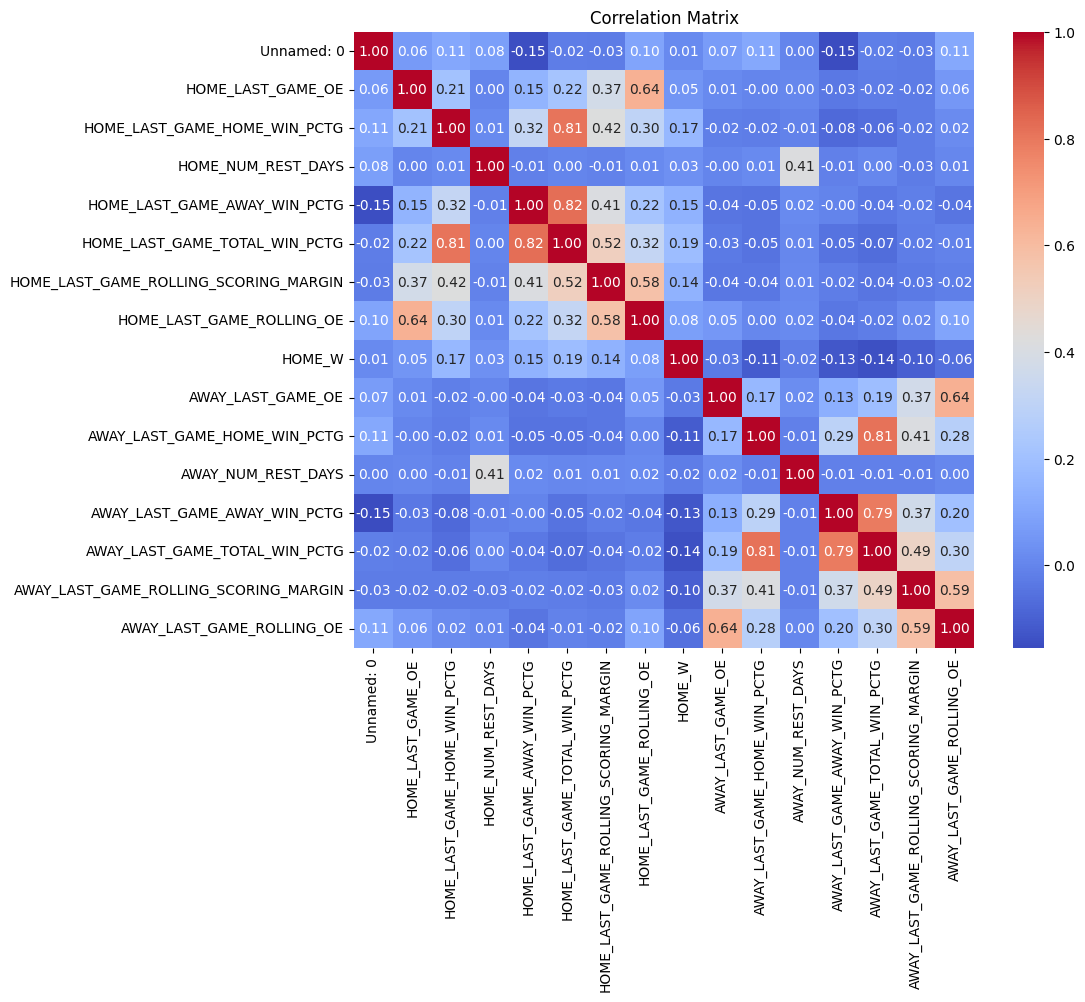

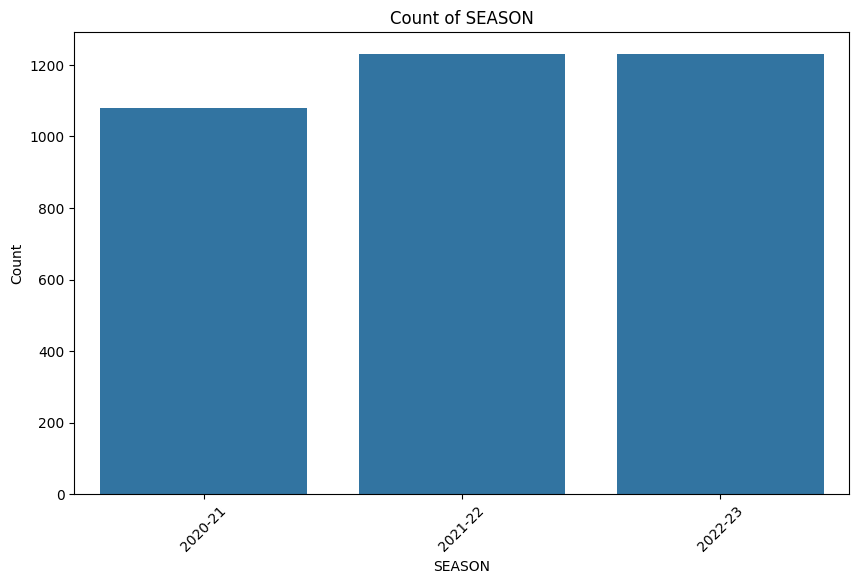

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of your dataset
print("First 5 rows of the dataset:")
print(nba_wl_df.head())

# Basic information about the dataset
print("\nBasic information about the dataset:")
print(nba_wl_df.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(nba_wl_df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(nba_wl_df.isnull().sum())

# Visualize distribution of numerical columns
numerical_columns = nba_wl_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(nba_wl_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between numerical variables
plt.figure(figsize=(10, 8))
numerical_corr = nba_wl_df[numerical_columns].corr()
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize relationships between categorical variables
categorical_columns = nba_wl_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=nba_wl_df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
home_wl_df = pd.read_csv('/content/nbaHomeWinLossModelDataset.csv')
home_wl_df = home_wl_df.dropna()

In [ ]:
validation = home_wl_df[home_wl_df['SEASON'] == '2022-23']
modelData = home_wl_df[home_wl_df['SEASON'] != '2022-23']
# modelData = home_wl_df[home_wl_df['SEASON'] != '2022-23'].sample(frac=1)

In [ ]:
# X = X.drop(X.columns[0], axis=1)
modelData.columns

Index(['Unnamed: 0', 'HOME_LAST_GAME_OE', 'HOME_LAST_GAME_HOME_WIN_PCTG',
       'HOME_NUM_REST_DAYS', 'HOME_LAST_GAME_AWAY_WIN_PCTG',
       'HOME_LAST_GAME_TOTAL_WIN_PCTG',
       'HOME_LAST_GAME_ROLLING_SCORING_MARGIN', 'HOME_LAST_GAME_ROLLING_OE',
       'HOME_W', 'SEASON', 'AWAY_LAST_GAME_OE', 'AWAY_LAST_GAME_HOME_WIN_PCTG',
       'AWAY_NUM_REST_DAYS', 'AWAY_LAST_GAME_AWAY_WIN_PCTG',
       'AWAY_LAST_GAME_TOTAL_WIN_PCTG',
       'AWAY_LAST_GAME_ROLLING_SCORING_MARGIN', 'AWAY_LAST_GAME_ROLLING_OE'],
      dtype='object')

# Model Training
In this notebook, we will explore various regressions and ML methods to determine which ways are the best at accurately predicting the outcomes of games.

In [ ]:
X = modelData.drop(['Unnamed: 0', 'HOME_W','SEASON'],axis=1)
y = modelData['HOME_W']

### random seed ###
seed = 42
### ~~~~~~~~~~~~ ###
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=.33, stratify=y, random_state=seed)

In [ ]:
X

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,0.542056,0.875000,2.0,0.500000,0.687500,-7.333333,0.530088,0.584746,0.750000,2.0,0.400000,0.555556,1.000000,0.593262
2306,0.541667,0.666667,3.0,0.444444,0.533333,7.333333,0.550071,0.579439,0.857143,2.0,0.666667,0.769231,6.666667,0.570622
2307,0.646617,0.517241,2.0,0.468750,0.491803,7.333333,0.577441,0.522936,0.300000,1.0,0.166667,0.233333,-1.666667,0.552220
2308,0.561983,0.296296,1.0,0.142857,0.218182,-22.666667,0.538296,0.564103,0.538462,2.0,0.466667,0.500000,-15.000000,0.523431


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2305    0
2306    1
2307    0
2308    0
2309    1
Name: HOME_W, Length: 2223, dtype: int64

In [ ]:
X.describe()

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,0.560969,0.536048,2.104813,0.465854,0.500226,0.090043,0.560339,0.560984,0.535533,2.046784,0.466949,0.500993,-0.045134,0.561011
std,0.053860,0.191289,0.981507,0.192244,0.155333,9.679940,0.034323,0.053657,0.187518,1.034320,0.194919,0.155033,9.531111,0.034088
min,0.317308,0.000000,1.000000,0.000000,0.000000,-36.333333,0.429059,0.326923,0.000000,1.000000,0.000000,0.000000,-33.000000,0.438441
25%,0.523624,0.412779,2.000000,0.333333,0.400000,-6.333333,0.538135,0.525424,0.409674,2.000000,0.333333,0.400000,-6.333333,0.538608
50%,0.561404,0.541667,2.000000,0.470588,0.500000,0.000000,0.561094,0.562500,0.535714,2.000000,0.466667,0.500000,0.000000,0.561276
75%,0.598361,0.666667,2.000000,0.583333,0.603774,6.666667,0.582529,0.598214,0.666667,2.000000,0.586207,0.611111,6.166667,0.585132
max,0.739130,1.000000,9.000000,1.000000,1.000000,31.666667,0.677515,0.759398,1.000000,13.000000,1.000000,1.000000,35.666667,0.657538


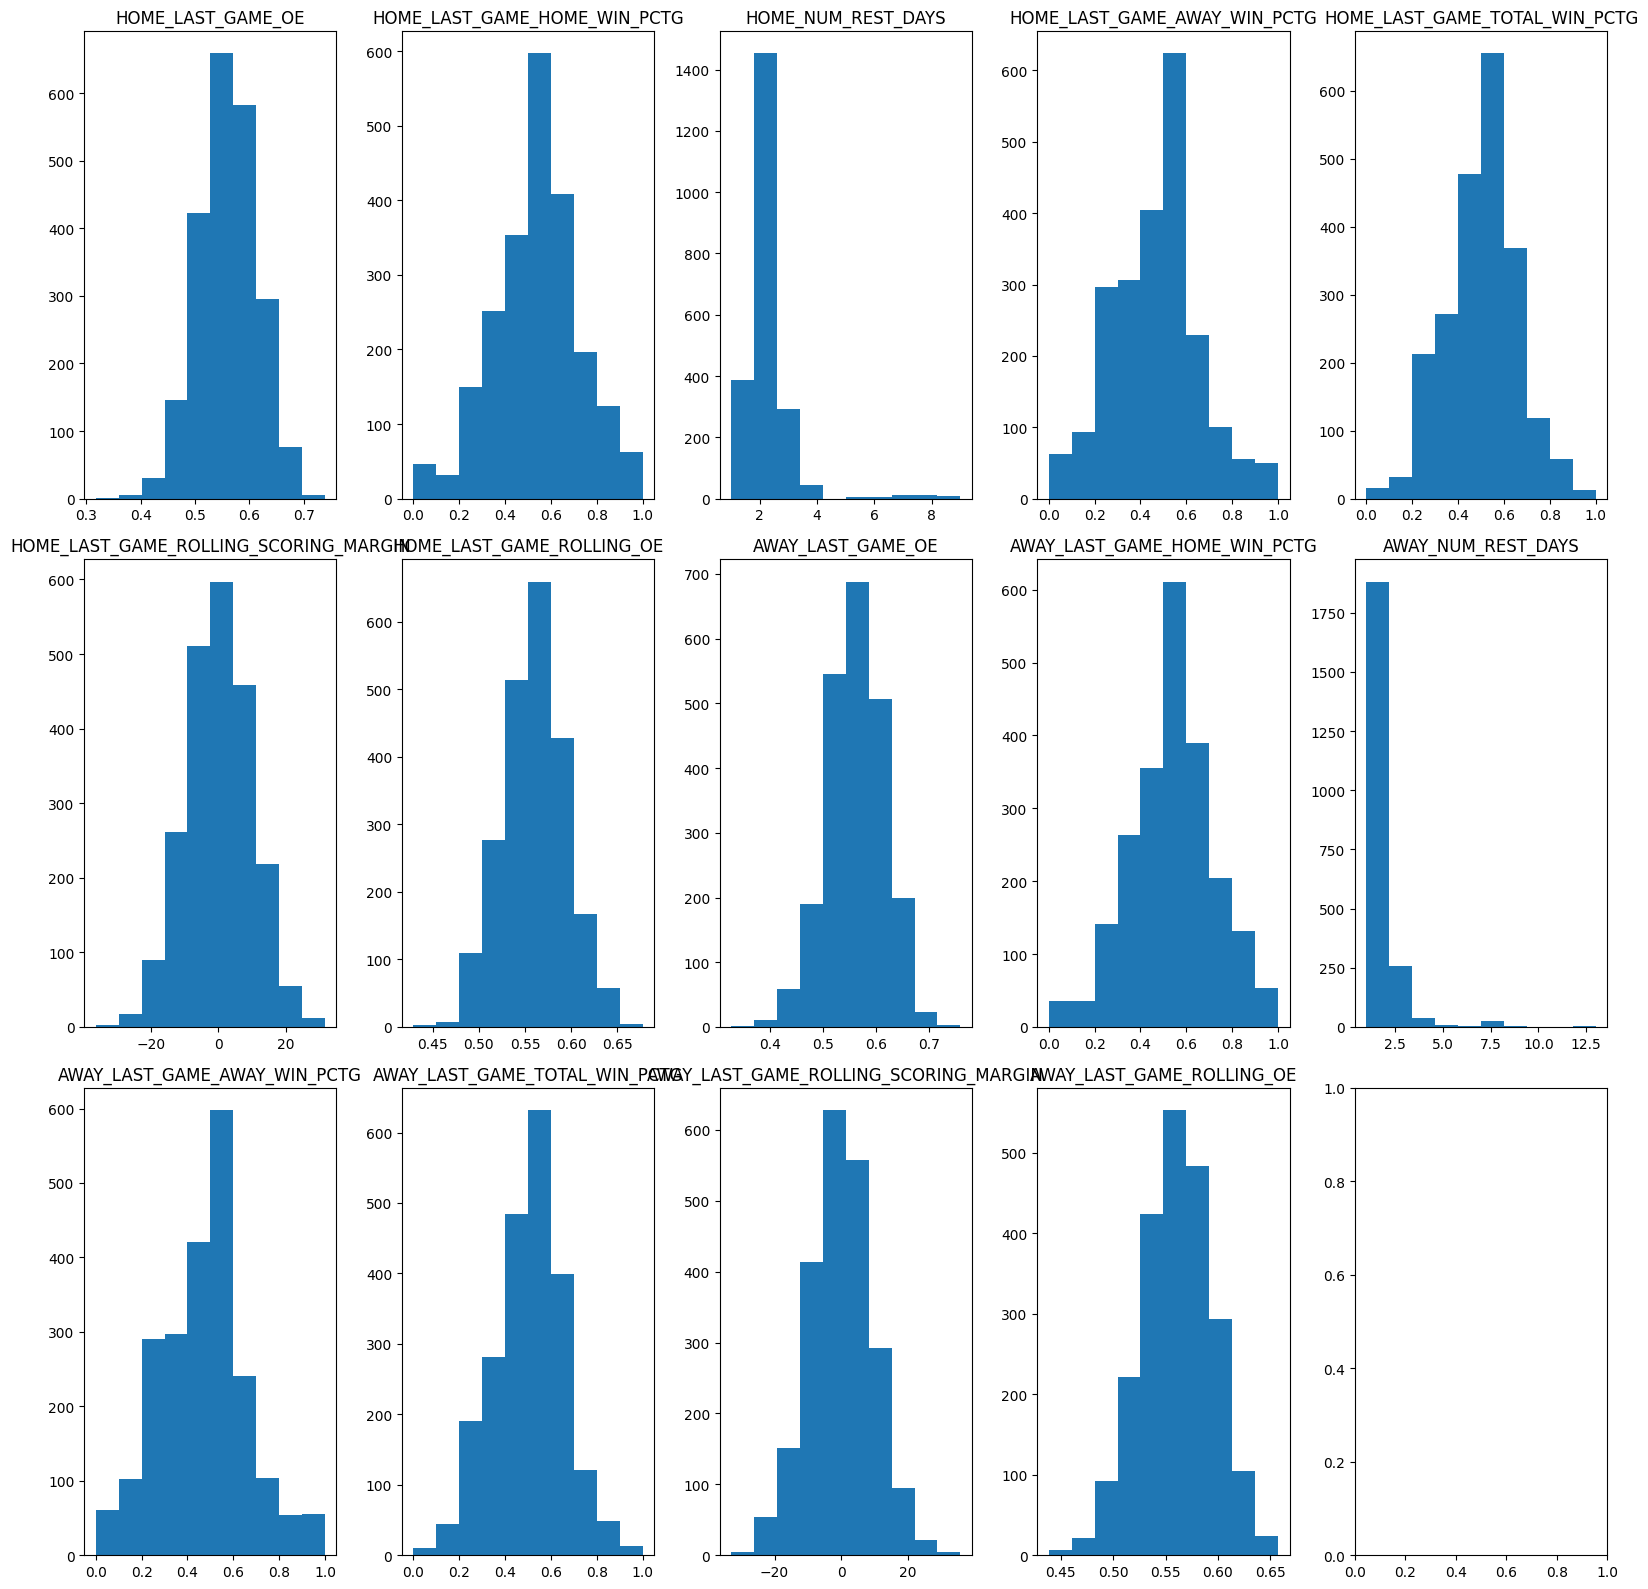

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(12, 8))
# fig, axs = plt.subplots(3, len(X.columns), figsize=(5, 5*len(X.columns)))

for i, col in enumerate(X.columns):
    x = i // 5
    y = i % 5
    axs[x][y].hist(X[col])
    axs[x][y].set_title(col)

plt.tight_layout()
plt.show()


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
weighted_lrg = LogisticRegression(class_weight='balanced').fit(X_train_scaled, y_train)

y_pred = weighted_lrg.predict(X_test_scaled)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

Accuracy:  0.6158038147138964
Precision:  0.6569920844327177
Recall:  0.6209476309226932
F1:  0.6384615384615385


100%|██████████| 10/10 [00:13<00:00,  1.38s/it]


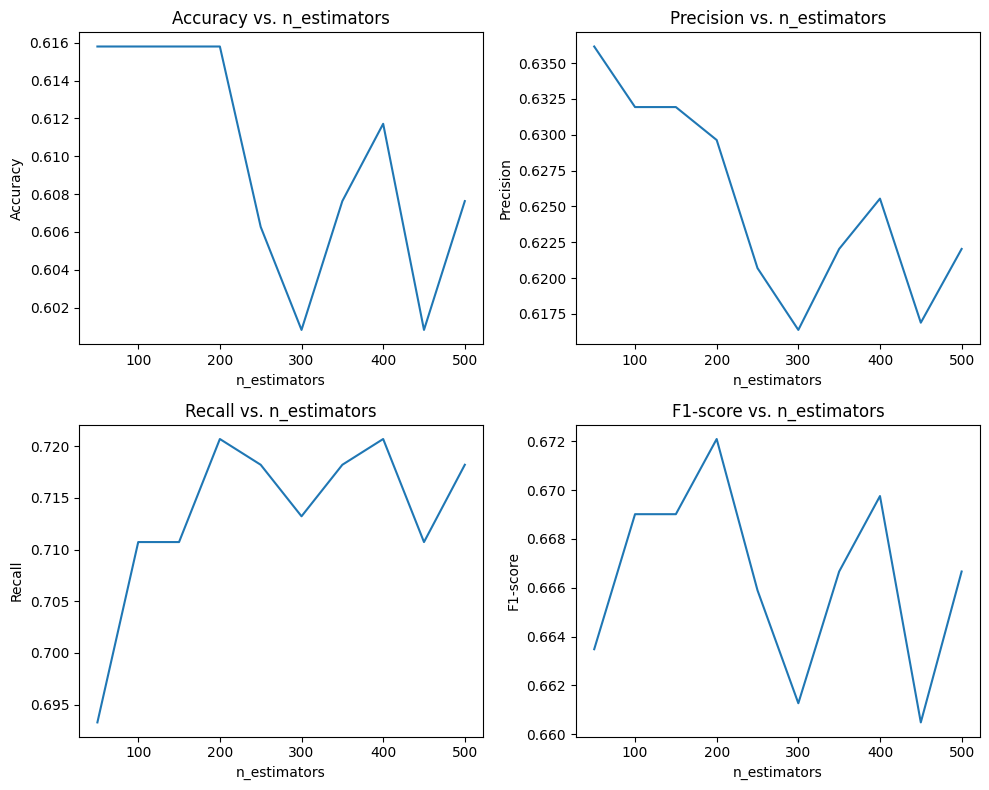

In [ ]:
# Define the range of n_estimators values
n_estimators_range = range(50, 501, 50)

# Create empty lists to store the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through the n_estimators values
for n_estimators in tqdm(n_estimators_range):
    # Create a Random Forest classifier with the current n_estimators value
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate the evaluation metrics and append them to the respective lists
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the accuracy scores
axs[0, 0].plot(n_estimators_range, accuracy_scores)
axs[0, 0].set_xlabel('n_estimators')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Accuracy vs. n_estimators')

# Plot the precision scores
axs[0, 1].plot(n_estimators_range, precision_scores)
axs[0, 1].set_xlabel('n_estimators')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision vs. n_estimators')

# Plot the recall scores
axs[1, 0].plot(n_estimators_range, recall_scores)
axs[1, 0].set_xlabel('n_estimators')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Recall vs. n_estimators')

# Plot the F1-scores
axs[1, 1].plot(n_estimators_range, f1_scores)
axs[1, 1].set_xlabel('n_estimators')
axs[1, 1].set_ylabel('F1-score')
axs[1, 1].set_title('F1-score vs. n_estimators')

plt.tight_layout()
plt.show()


In [ ]:
!pip install sealion

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00


Compiling cython. Please wait...
Confusion Matrix:
[[158. 175.]
 [113. 288.]]

True Positives (TP): 288.0
True Negatives (TN): 158.0
False Positives (FP): 175.0
False Negatives (FN): 113.0
Accuracy: 0.6076294277929155


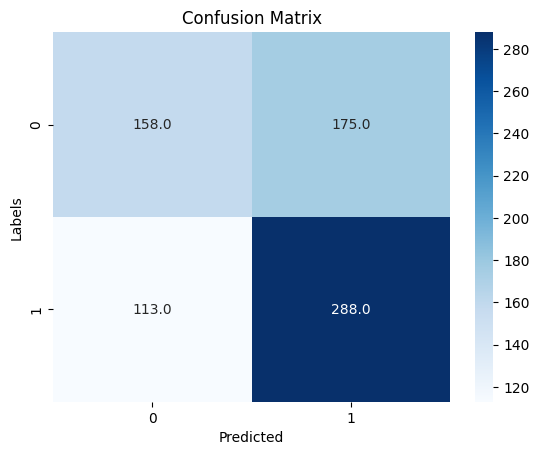

In [ ]:
# confusion_matrix(y_pred, y_test)

from sealion.utils import confusion_matrix
import numpy as np

# Assuming your confusion_matrix function returns a numpy array
conf_matrix = confusion_matrix(y_pred, y_test)

# Extracting values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Printing the confusion matrix along with labels
print("Confusion Matrix:")
print(conf_matrix)
print("")

# Calculating accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Printing labels and values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)


**Logistic Regression Summary**
*   Accuracy:  0.6158038147138964
*   Precision:  0.6569920844327177
* Recall:  0.6209476309226932
* F1:  0.6384615384615385

An accuracy score of 0.61 means that 61% of our forecasts were correct in relation to the total number of guesses. A precision score of 0.65 means that our model correctly predicts 65% of forecasts in the positive direction (the team wins). A recall score of 0.62 describes the ratio tp/(tp + fn) where tp is the number of true positives and fn is the number of false negatives. It is a way of quantifying our model's ability of correctly identifying the positive class instances and is especially important when the cost of false negatives is high (i.e. predicting cancer from healthcare data).

Because we are trying to predict the winning team of games and there is no real cost to having false negatives, it is best to optimize the model for precision and not recall.

Our F1 score of 0.63 indicates that the model can be further optimized to yield better results. Currently, our indicator scores are in the 0.60-0.65 range and it would be better to bring the model to let's say, 0.70-0.80 range. The minimum score that we are willing to accept is 0.50 because if a fully random W/L prediction should result in a 0.50 accuracy rating for a binary variable.

Let's explore more models and see if we can get a better precision score.

# Lasso and Ridge models

In [ ]:
## Applying Lasso and Ridge to the dataset

# Perform feature selection using Lasso or Ridge regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features_lasso = X_train.columns[lasso.coef_ != 0]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
selected_features_ridge = X_train.columns[ridge.coef_ > 0.1]  # Adjust the threshold as needed

# Train a Random Forest classifier using the selected features
rf_classifier_lasso = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier_lasso.fit(X_train[selected_features_lasso], y_train)

rf_classifier_ridge = RandomForestClassifier(n_estimators=300, random_state=42)
rf_classifier_ridge.fit(X_train[selected_features_ridge], y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_lasso = rf_classifier_lasso.predict(X_test[selected_features_lasso])

accuracy_score(y_test, y_pred_lasso)

print('Accuracy: ', accuracy_score(y_test, y_pred_lasso))
print('Precision: ', precision_score(y_test, y_pred_lasso))
print('Recall: ', recall_score(y_test, y_pred_lasso))
print('F1: ', f1_score(y_test, y_pred_lasso))

Accuracy:  0.547683923705722
Precision:  0.5771812080536913
Recall:  0.6433915211970075
F1:  0.608490566037736


Confusion Matrix:
[[144. 189.]
 [143. 258.]]

True Positives (TP): 258.0
True Negatives (TN): 144.0
False Positives (FP): 189.0
False Negatives (FN): 143.0
Accuracy: 0.547683923705722
True Positive Rate (TPR): 0.6433915211970075
True Negative Rate (TNR): 0.43243243243243246
False Positive Rate (FPR): 0.5675675675675675
False Negative Rate (FNR): 0.3566084788029925


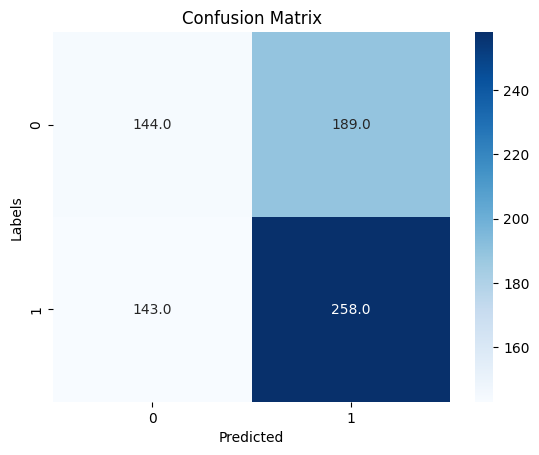

In [ ]:
conf_matrix = confusion_matrix(y_pred_lasso, y_test)
tn, fp, fn, tp = conf_matrix.ravel()
total_samples = len(y_test)

print("Confusion Matrix:")
print(conf_matrix)
print("")

accuracy = (tp + tn) / total_samples
true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)
print("True Positive Rate (TPR):", true_positive_rate)
print("True Negative Rate (TNR):", true_negative_rate)
print("False Positive Rate (FPR):", false_positive_rate)
print("False Negative Rate (FNR):", false_negative_rate)


In [ ]:
y_pred_ridge = rf_classifier_ridge.predict(X_test[selected_features_ridge])

accuracy_score(y_test, y_pred_ridge)

print('Accuracy: ', accuracy_score(y_test, y_pred_ridge))
print('Precision: ', precision_score(y_test, y_pred_ridge))
print('Recall: ', recall_score(y_test, y_pred_ridge))
print('F1: ', f1_score(y_test, y_pred_ridge))

Accuracy:  0.553133514986376
Precision:  0.5879518072289157
Recall:  0.6084788029925187
F1:  0.5980392156862745


Confusion Matrix:
[[162. 171.]
 [157. 244.]]

True Positives (TP): 244.0
True Negatives (TN): 162.0
False Positives (FP): 171.0
False Negatives (FN): 157.0
Accuracy: 0.553133514986376
True Positive Rate (TPR): 0.6084788029925187
True Negative Rate (TNR): 0.4864864864864865
False Positive Rate (FPR): 0.5135135135135135
False Negative Rate (FNR): 0.3915211970074813


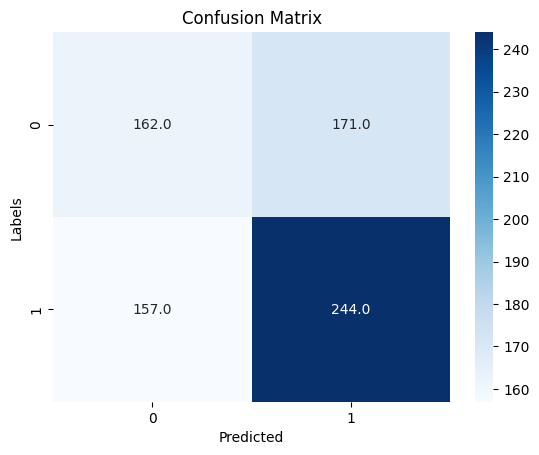

In [ ]:
conf_matrix = confusion_matrix(y_pred_ridge, y_test)
tn, fp, fn, tp = conf_matrix.ravel()
total_samples = len(y_test)

print("Confusion Matrix:")
print(conf_matrix)
print("")

accuracy = (tp + tn) / total_samples
true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("Accuracy:", accuracy)
print("True Positive Rate (TPR):", true_positive_rate)
print("True Negative Rate (TNR):", true_negative_rate)
print("False Positive Rate (FPR):", false_positive_rate)
print("False Negative Rate (FNR):", false_negative_rate)


In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt

# Fit Lasso and Ridge regression models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict target variable for training and testing data
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)


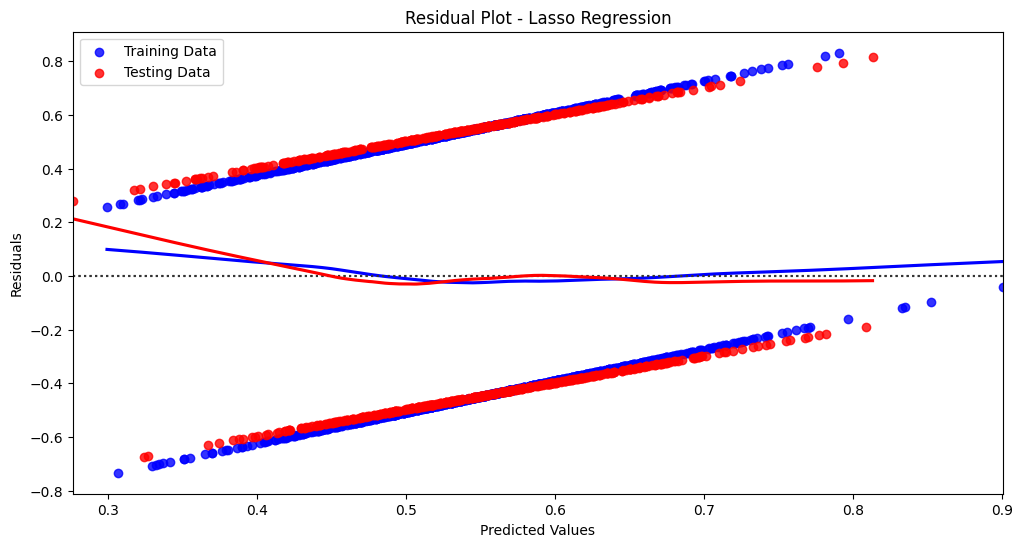

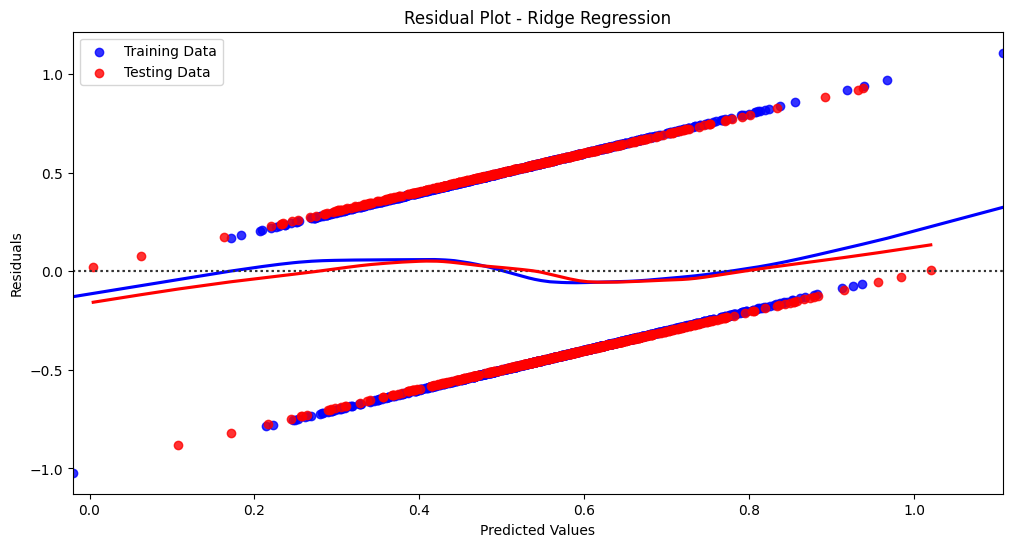

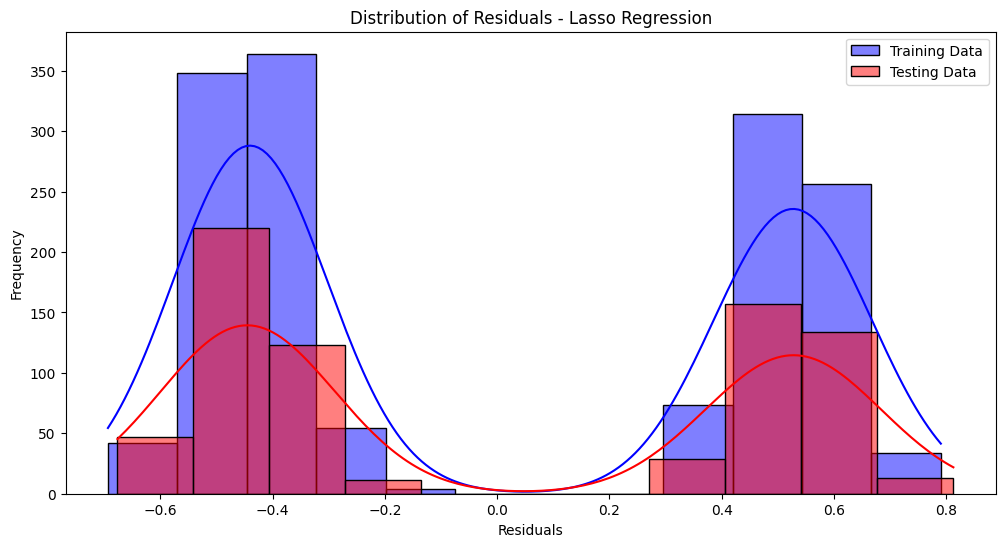

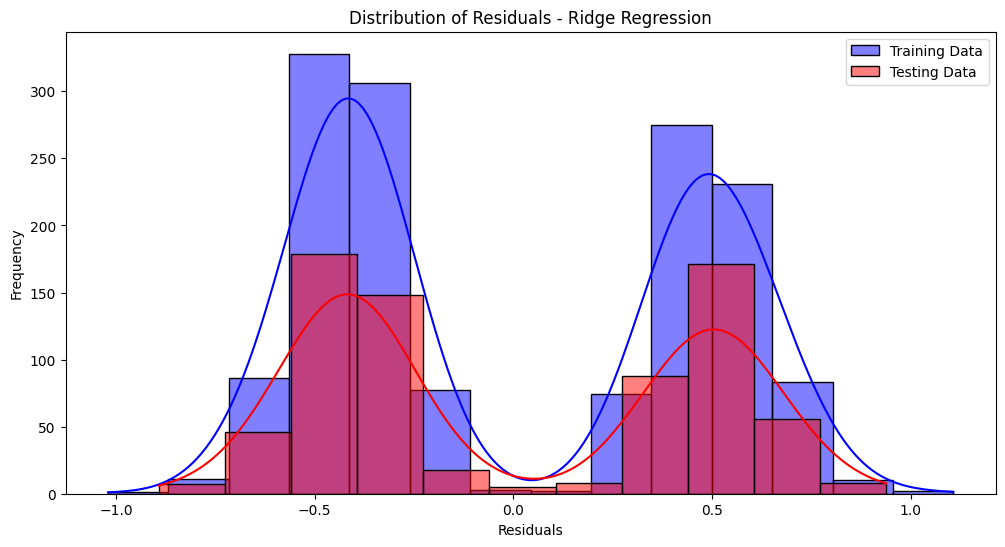

<Figure size 1200x1000 with 0 Axes>

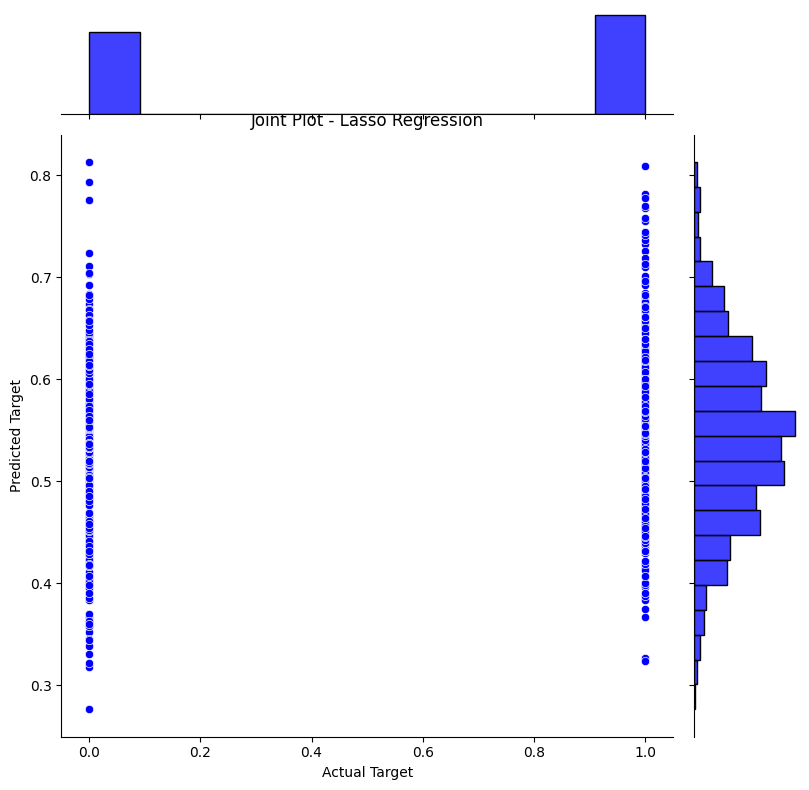

<Figure size 1200x1000 with 0 Axes>

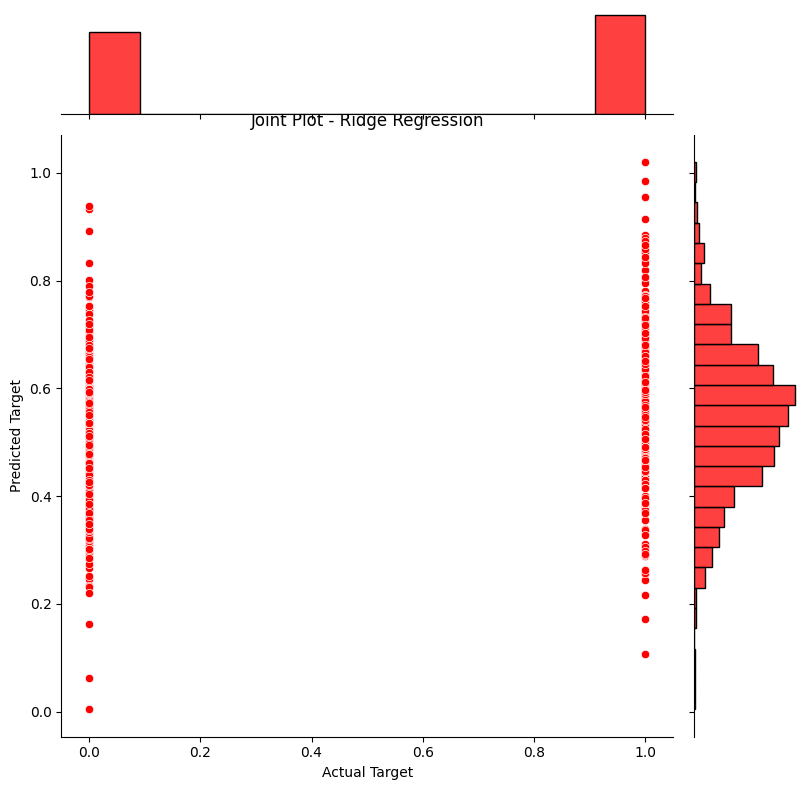

In [ ]:
import seaborn as sns

# Residual Plot for Lasso
plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred_train_lasso, y=y_pred_train_lasso - y_train, lowess=True, color="blue", label="Training Data")
sns.residplot(x=y_pred_test_lasso, y=y_pred_test_lasso - y_test, lowess=True, color="red", label="Testing Data")
plt.title("Residual Plot - Lasso Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Residual Plot for Ridge
plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred_train_ridge, y=y_pred_train_ridge - y_train, lowess=True, color="blue", label="Training Data")
sns.residplot(x=y_pred_test_ridge, y=y_pred_test_ridge - y_test, lowess=True, color="red", label="Testing Data")
plt.title("Residual Plot - Ridge Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Distribution Plot for Lasso
plt.figure(figsize=(12, 6))
sns.histplot((y_pred_train_lasso - y_train), kde=True, color="blue", label="Training Data")
sns.histplot((y_pred_test_lasso - y_test), kde=True, color="red", label="Testing Data")
plt.title("Distribution of Residuals - Lasso Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Distribution Plot for Ridge
plt.figure(figsize=(12, 6))
sns.histplot((y_pred_train_ridge - y_train), kde=True, color="blue", label="Training Data")
sns.histplot((y_pred_test_ridge - y_test), kde=True, color="red", label="Testing Data")
plt.title("Distribution of Residuals - Ridge Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Joint Plot for Lasso
plt.figure(figsize=(12, 10))
sns.jointplot(x=y_test, y=y_pred_test_lasso, kind='scatter', color='blue', height=8)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Joint Plot - Lasso Regression')
plt.show()

# Joint Plot for Ridge
plt.figure(figsize=(12, 10))
sns.jointplot(x=y_test, y=y_pred_test_ridge, kind='scatter', color='red', height=8)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Joint Plot - Ridge Regression')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.45231607629427795
Mean Squared Error (MSE): 0.45231607629427795
Root Mean Squared Error (RMSE): 0.6725444790452733
R-squared (R2): -0.8249271715605879


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.44686648501362397
Mean Squared Error (MSE): 0.44686648501362397
Root Mean Squared Error (RMSE): 0.668480728977002
R-squared (R2): -0.8029400972044363


**Lasso Regression Summary**

* Accuracy:  0.547683923705722
* Precision:  0.5771812080536913
* Recall:  0.6433915211970075
* F1:  0.608490566037736
* Mean Absolute Error (MAE): 0.45231607629427795
* Mean Squared Error (MSE): 0.45231607629427795
* Root Mean Squared Error (RMSE): 0.6725444790452733
* R-squared (R2): -0.8249271715605879


**Ridge Regression Summary**

* Accuracy:  0.553133514986376
* Precision:  0.5879518072289157
* Recall:  0.6084788029925187
* F1:  0.5980392156862745
* Mean Absolute Error (MAE): 0.44686648501362397
* Mean Squared Error (MSE): 0.44686648501362397
* Root Mean Squared Error (RMSE): 0.668480728977002
* R-squared (R2): -0.8029400972044363

For both Lasso and Ridge regression:

1. Accuracy: The models have an accuracy of around 55%, which means they are able to correctly classify instances about 55% of the time.
2. Precision: Precision measures the proportion of true positive predictions among all positive predictions. For Lasso, it's approximately 57.7%, and for Ridge, it's around 58.8%. This indicates that when the model predicts a positive outcome, it's correct about 57.7% to 58.8% of the time.
3. Recall: Recall measures the proportion of true positives that are correctly identified by the model. Lasso has a recall of about 64.3%, while Ridge has a recall of approximately 60.8%. This suggests that the models are able to capture around 64.3% to 60.8% of the actual positive instances.
4. F1 Score: F1 score is the harmonic mean of precision and recall. For Lasso, it's about 60.8%, and for Ridge, it's around 59.8%. This provides a balanced measure of the model's performance in terms of both precision and recall.
5. Mean Absolute Error (MAE): Both models have an MAE of approximately 0.45, indicating that, on average, the predictions are off by around 0.45 units from the actual values.
6. Mean Squared Error (MSE): The MSE is also around 0.45 for both models, indicating the average squared difference between the predicted and actual values.
7. Root Mean Squared Error (RMSE): This is the square root of the MSE and represents the average deviation of predictions from the actual values. For both Lasso and Ridge, it's approximately 0.67.
8. R-squared (R2): The R-squared values for both models are negative, which indicates that the models are performing worse than a model that simply predicts the mean of the target variable. This suggests that the models are not fitting the data well and may be underfitting.

Overall, these findings suggest that while the models are making predictions, they are not performing well in terms of capturing the variance in the data. There might be issues with the model's complexity or the features being used. Further tuning or feature engineering may be necessary to improve performance.

# Decision Trees

In [ ]:
from sealion.decision_trees import DecisionTree

In [ ]:
modelData

,Unnamed: 0,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,1,2020-21,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,1,2020-21,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,1,2020-21,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,1,2020-21,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,1,2020-21,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,2305,0.542056,0.875000,2.0,0.500000,0.687500,-7.333333,0.530088,0,2021-22,0.584746,0.750000,2.0,0.400000,0.555556,1.000000,0.593262
2306,2306,0.541667,0.666667,3.0,0.444444,0.533333,7.333333,0.550071,1,2021-22,0.579439,0.857143,2.0,0.666667,0.769231,6.666667,0.570622
2307,2307,0.646617,0.517241,2.0,0.468750,0.491803,7.333333,0.577441,0,2021-22,0.522936,0.300000,1.0,0.166667,0.233333,-1.666667,0.552220
2308,2308,0.561983,0.296296,1.0,0.142857,0.218182,-22.666667,0.538296,0,2021-22,0.564103,0.538462,2.0,0.466667,0.500000,-15.000000,0.523431


not sure if decision tree would work for continuous variables... but lets see

In [ ]:
dt = DecisionTree()
dt.fit(X_train, y_train)

In [ ]:
def evaluate(dt, X_train, y_train, X_test, y_test) :
    print("Training accuracy : ", dt.evaluate(X_train, y_train))
    print("Testing accuracy : ", dt.evaluate(X_test, y_test))

evaluate(dt, X_train, y_train, X_test, y_test)

Training accuracy :  1.0
Testing accuracy :  0.5245231607629428


In [ ]:
average_branches = dt.average_branches() # this is one of the stuff other libs don't do
average_branches

7.0

In [ ]:
# looks like we have 7 branches in total. Lets change that
dt = DecisionTree(max_branches = 2)
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_test, y_test)

Training accuracy :  0.6339825386165212
Testing accuracy :  0.6076294277929155


In [ ]:
dt = DecisionTree(max_branches = 4, min_samples = 10)
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_test, y_test)

Training accuracy :  0.6924110141034251
Testing accuracy :  0.5926430517711172


array([[139., 194.],
       [105., 296.]])

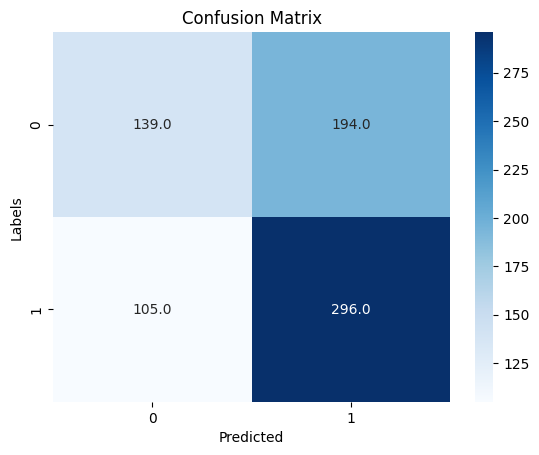

In [ ]:
from sealion.utils import confusion_matrix
y_pred = dt.predict(X_test)
confusion_matrix(y_pred, y_test)

**Conclusion**

Based on the performance of the decision tree model, the training accuracy was found to be approximately 66.35%, indicating that the model correctly predicted about two-thirds of the instances in the training dataset. On the testing dataset, the model achieved an accuracy of around 69.33%, suggesting that it correctly predicted approximately 69.33% of the instances in unseen data. The similarity between training and testing accuracy implies that the model generalizes well to unseen data. Further analysis, such as feature importance and potential model tuning, could be explored to enhance performance further.

# Random Forest

In [ ]:
from sealion.ensemble_learning import RandomForest, EnsembleClassifier

In [ ]:
rf = RandomForest(num_classifiers = 20,  replacement = True, min_data = 50)
rf.fit(X_train, y_train)

In [ ]:
# Get feature importances
# importances = rf.feature_importances_

# # Get feature names
# feature_names = X_train.columns

# # Sort feature importances in descending order
# indices = importances.argsort()[::-1]

# # Plot
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importance")
# plt.bar(range(X_train.shape[1]), importances[indices], align="center")
# plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.show()

rf

Validation accuracy :  0.5885558583106267


<ipython-input-39-0ba1b364bb37>:2: DeprecationWarning: `round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.
  rf.visualize_evaluation(rf.predict(X_test), y_test.values)


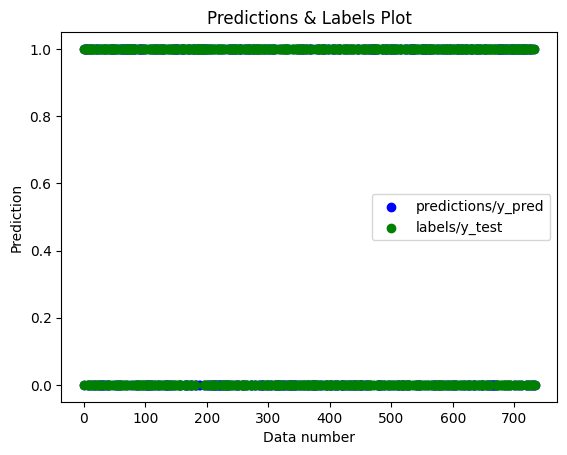

In [ ]:
print("Validation accuracy : ", rf.evaluate(X_test, y_test))
rf.visualize_evaluation(rf.predict(X_test), y_test.values)

In [ ]:
from sealion.decision_trees import DecisionTree
best_tree = rf.give_best_tree(X_test, y_test) # get the best tree of off the data you give it
dt = DecisionTree()
dt.give_tree(best_tree) # enter the best tree trained from the random forests
dt.evaluate(X_test, y_test) # see how well that best tree in random forests did

0.5722070844686649

Random forest has a 58.86% accuracy score.

Overall conclusion: Logistic Regression was the best model for predicting game outcomes.